# Import necessary libraries

In [1]:
# For data processing.
import pandas as pd
import numpy as np

# For data visualization.
import seaborn as sb
import matplotlib.pyplot as plt

# Set the default Seaborn style for better aesthetics and usability.
sb.set() 

# Disable warnings related to chained assignments to simplify code and output readability.
pd.options.mode.chained_assignment = None

In [2]:
# Load data from a CSV file and remove an unnecessary column immediately after loading.
data = pd.read_csv("csvs/clean.csv").drop(columns='Unnamed: 0')
# Split string entries in specified columns by ';' and convert them into lists for easier data manipulation.
for c in ['keywords','directors','cast','genres','networks','production_companies']:
    data[c] = data[c].str.split(';')
data.head()

,tmdb_id,name,original_name,keywords,airing_date,directors,cast,genres,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,networks,production_companies,cast_popularity
0,99966,All of Us Are Dead,지금 우리 학교는,"[high school, bullying, based on comic, horror...",2022-01-28,[JQ Lee],"[Park Ji-hu, Yoon Chan-young, Cho Yi-hyun, Lom...","[Action & Adventure, Drama, Sci-Fi & Fantasy]",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,[Netflix],"[Kim Jong-hak Production, SLL, Film Monster]",82.507
1,93405,Squid Game,오징어 게임,"[secret organization, challenge, survival, fic...",2021-09-17,[Hwang Dong-hyuk],"[Lee Jung-jae, Park Hae-soo, Jung Ho-yeon, Wi ...","[Action & Adventure, Mystery, Drama]",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,[Netflix],[Siren Pictures],68.428
2,136699,Glitch,글리치,"[friendship, investigation, ufo, miniseries, s...",2022-10-07,[Roh Deok],"[Jeon Yeo-been, Nana, Lee Dong-hwi, Ryu Kyung-...","[Drama, Comedy, Mystery, Sci-Fi & Fantasy]",1.0,10.0,54.0,A young woman joins forces with a UFO enthusia...,223.442,7.674,43.0,[Netflix],[Studio 329],81.095
3,197067,Extraordinary Attorney Woo,이상한 변호사 우영우,"[court case, court, autism, lawyer, courtroom,...",2022-06-29,[Yoo In-sik],"[Park Eun-bin, Kang Tae-oh, Kang Ki-young, Jeo...","[Drama, Comedy]",1.0,16.0,70.0,Brilliant attorney Woo Young-woo tackles chall...,147.054,8.310,381.0,"[Netflix, ENA]","[AStory, KT Studio Genie]",131.091
4,129473,Young Lady and Gentleman,신사와 아가씨,"[tutor, family, single father, healing, rich m...",2021-09-25,NaN,"[Ji Hyun-woo, Lee Se-hee, Park Ha-na, Oh Hyun-...","[Comedy, Drama, Family]",1.0,52.0,70.0,Lee Young Kook is a widower with three childre...,128.825,8.125,8.0,[KBS2],NaN,71.909


# Exploratory Data Analysis #1: Exploratory Regression

This data we will be using has several numerical data. Let us first discover them.

In [3]:
data.describe()

,tmdb_id,number_of_seasons,number_of_episodes,episode_run_time,popularity,average_rating,rating_count,cast_popularity
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,78185.099890,1.051592,27.829857,55.209660,12.093599,7.483064,49.972558,49.267896
std,41721.571592,0.286270,33.021815,63.721828,23.358501,1.309316,420.393845,29.800488
min,333.000000,1.000000,1.000000,1.000000,0.600000,0.500000,1.000000,1.200000
25%,50840.500000,1.000000,15.000000,35.000000,3.541000,7.000000,2.000000,26.989000
50%,71640.000000,1.000000,16.000000,60.000000,6.198000,7.750000,5.000000,45.977000
75%,99479.500000,1.000000,26.500000,65.000000,12.058500,8.273500,14.000000,64.907000
max,210674.000000,6.000000,476.000000,1585.000000,398.111000,10.000000,11835.000000,199.847000


The following are the numerical data we have identified:

1. Number of Episodes - While discrete, the number varies quite a lot between dramas.
2. Episode Runtime    - Each drama has its own expected episode runtime.
3. Popularity         - The Movie Database (TMDB) bases the show's popularity on several attributes like number of votes, views, number of users who marked it as "favourite", number of users who added it to their "watchlist" etc.
4. Average Rating     - On a scale of 1 to 10, the average rating is continuous after being averaged from the total ratings.
5. Rating Count       - Entirely dependent on how many people gave the ratings.
6. Cast Popularity    - Compiled in Data Cleaning notebook using individual popularity of the cast members.
                        TMDB bases this on views of the cast and the previous day's score.

In addition, "number_of_seasons" is a categorical data, having commonly 1-3 seasons with the exception of a very select few.

Before any exploration, we shall conjecture some predictions on the data.

1. Number of Episodes vs. Cast Popularity
   > Belief: With a more popular cast, the number of episodes is likely to decrease due to their busier schedules.
2. Episode Runtime vs. Popularity
   > Belief: People might be less likely to start a drama that has too long episodes.
3. Average Rating vs. Popularity
   > Belief: Better rated dramas are more likely to entice more viewers.
4. Cast Popularity vs. Popularity
   > Belief: More popular cast will entice a larger pool of their fans, bringing more interest in the drama.
5. Popularity vs. Rating Count
   > Belief: More popular dramas will entice more viewers to discuss and rate the drama.

Now, let us start with comparing the pair plot.

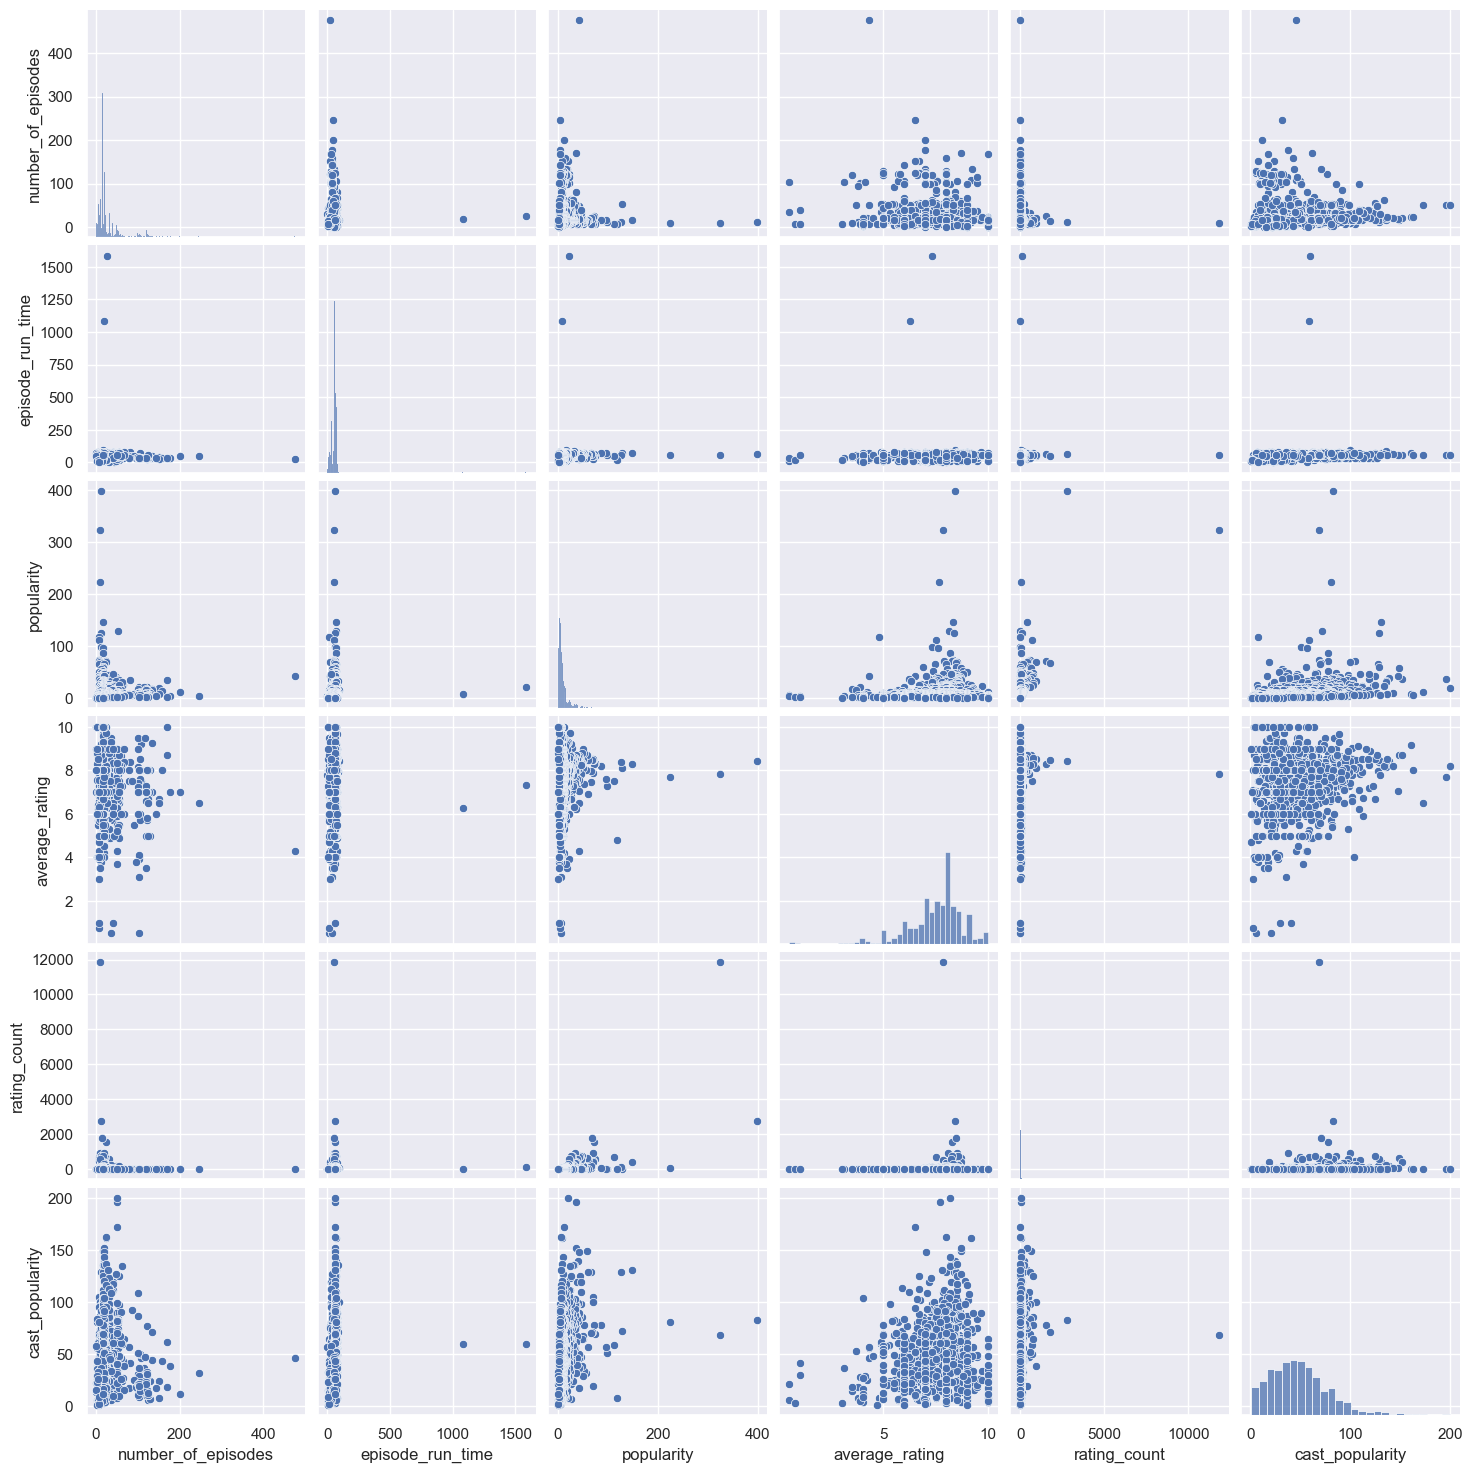

In [4]:
num_cols = ['number_of_episodes','episode_run_time','popularity','average_rating','rating_count','cast_popularity']
sb.pairplot(data=data[num_cols])

From the pair plot, we can observe some extreme outlier data. As such, let us first individually remove them.

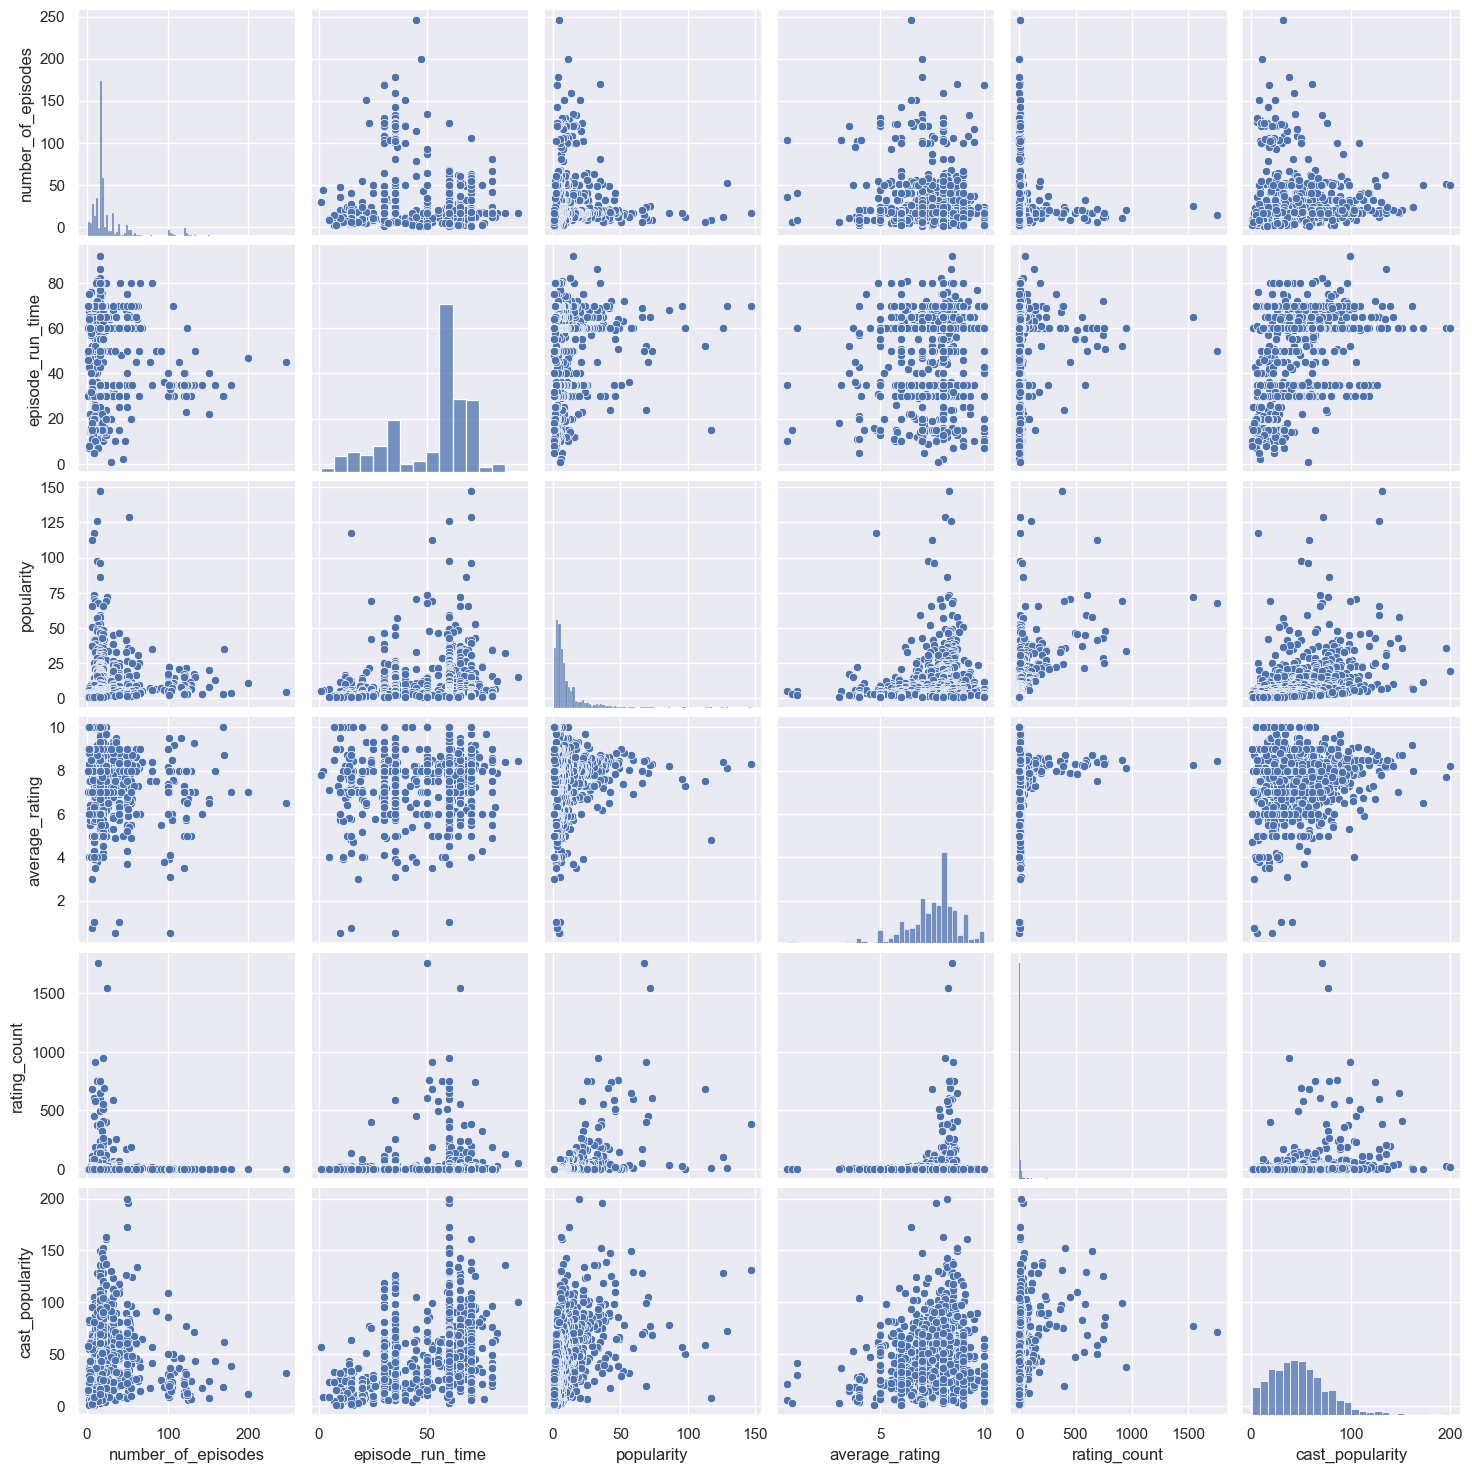

In [5]:
without_extreme = data.drop(data[data.episode_run_time>1000].index)
without_extreme.drop(without_extreme[without_extreme.number_of_episodes>400].index,inplace=True)
without_extreme.drop(without_extreme[without_extreme.rating_count>5000].index,inplace=True)
without_extreme.drop(without_extreme[without_extreme.popularity>200].index,inplace=True)
sb.pairplot(data=without_extreme[num_cols])

With this, we shall make a few observations on our predictions first.

1. Number of Episodes vs. Cast Popularity
   > There seems to be a decreasing trend in cast popularity as the episodes increase. Correlation does not seem to be strong.
2. Episode Runtime vs. Popularity
   > There seems to be an ideal episode runtime for a series to peak at a higher popularity. Correlation does not seem too strong.
3. Average Rating vs. Popularity
   > There seems to be an increasing trend on the popularity as average rating increases with some outliers. Correlation does not seem too strong.
4. Cast Popularity vs. Popularity
   > There seems to be an increasing trend on popularity with cast popularity. Correlation can be explored.
5. Popularity vs. Rating Count
   > There seems to be very dense data at low popularity and rating counts, but correlation can be explored.

## Helper functions for Univariate Linear Regression

In [6]:
# Import essential models and functions from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmv_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[col] >= upper)[0]
    lower_array = np.where(df[col] <= lower)[0]
     
    # Removing the outliers.
    return df.drop(index=upper_array).drop(index=lower_array)

In [8]:
def gen_uv_reg(X_name, y_name, data=data, rmv_outliers_X=False, rmv_outliers_y=False, test_size=0.25):
    use = data
    if rmv_outliers_X and rmv_outliers_y:
        # Merge dataframes with outliers removed from both X and Y.
        use = pd.merge(pd.DataFrame(rmv_outliers(data, X_name)[[X_name, y_name]]), pd.DataFrame(rmv_outliers(data, y_name))[[X_name, y_name]])
    elif rmv_outliers_X and not rmv_outliers_y:
        # Remove outliers from X only.
        use = pd.DataFrame(rmv_outliers(data, X_name))
    elif rmv_outliers_y and not rmv_outliers_X:
        # Remove outliers from Y only.
        use = pd.DataFrame(rmv_outliers(data, y_name))
    else:
        # Use the original dataset if no outlier removal is specified.
        use = data

    X = pd.DataFrame(use[X_name])
    y = pd.DataFrame(use[y_name])
    
    # Split data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Initialize and fit the linear regression model.
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Output the intercept and coefficients of the regression model.
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    # Predict response variable for both training and testing sets.
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data).
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data).
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
     # Return the model and split datasets.
    return linreg, X_train, y_train, X_test, y_test

In [9]:
def plot_pred_vs_true(linreg, y_train, y_test):
    # Predict the response variable for the training and testing data using the provided linear regression model.
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Create a subplot with 1 row and 2 columns for plotting both training and testing predictions.
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    
    # Plot training data predictions: true values vs. predicted values.
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    
    # Plot testing data predictions: true values vs. predicted values.
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

### Univariate Linear Regression for "popularity" against "average_rating"


Intercept of Regression 	: b =  [6.08923294]
Coefficients of Regression 	: a =  [[0.19182388]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0013147754854369031
Mean Squared Error (MSE) 	: 28.180524905241743

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.02094774867079563
Mean Squared Error (MSE) 	: 23.473313345713922



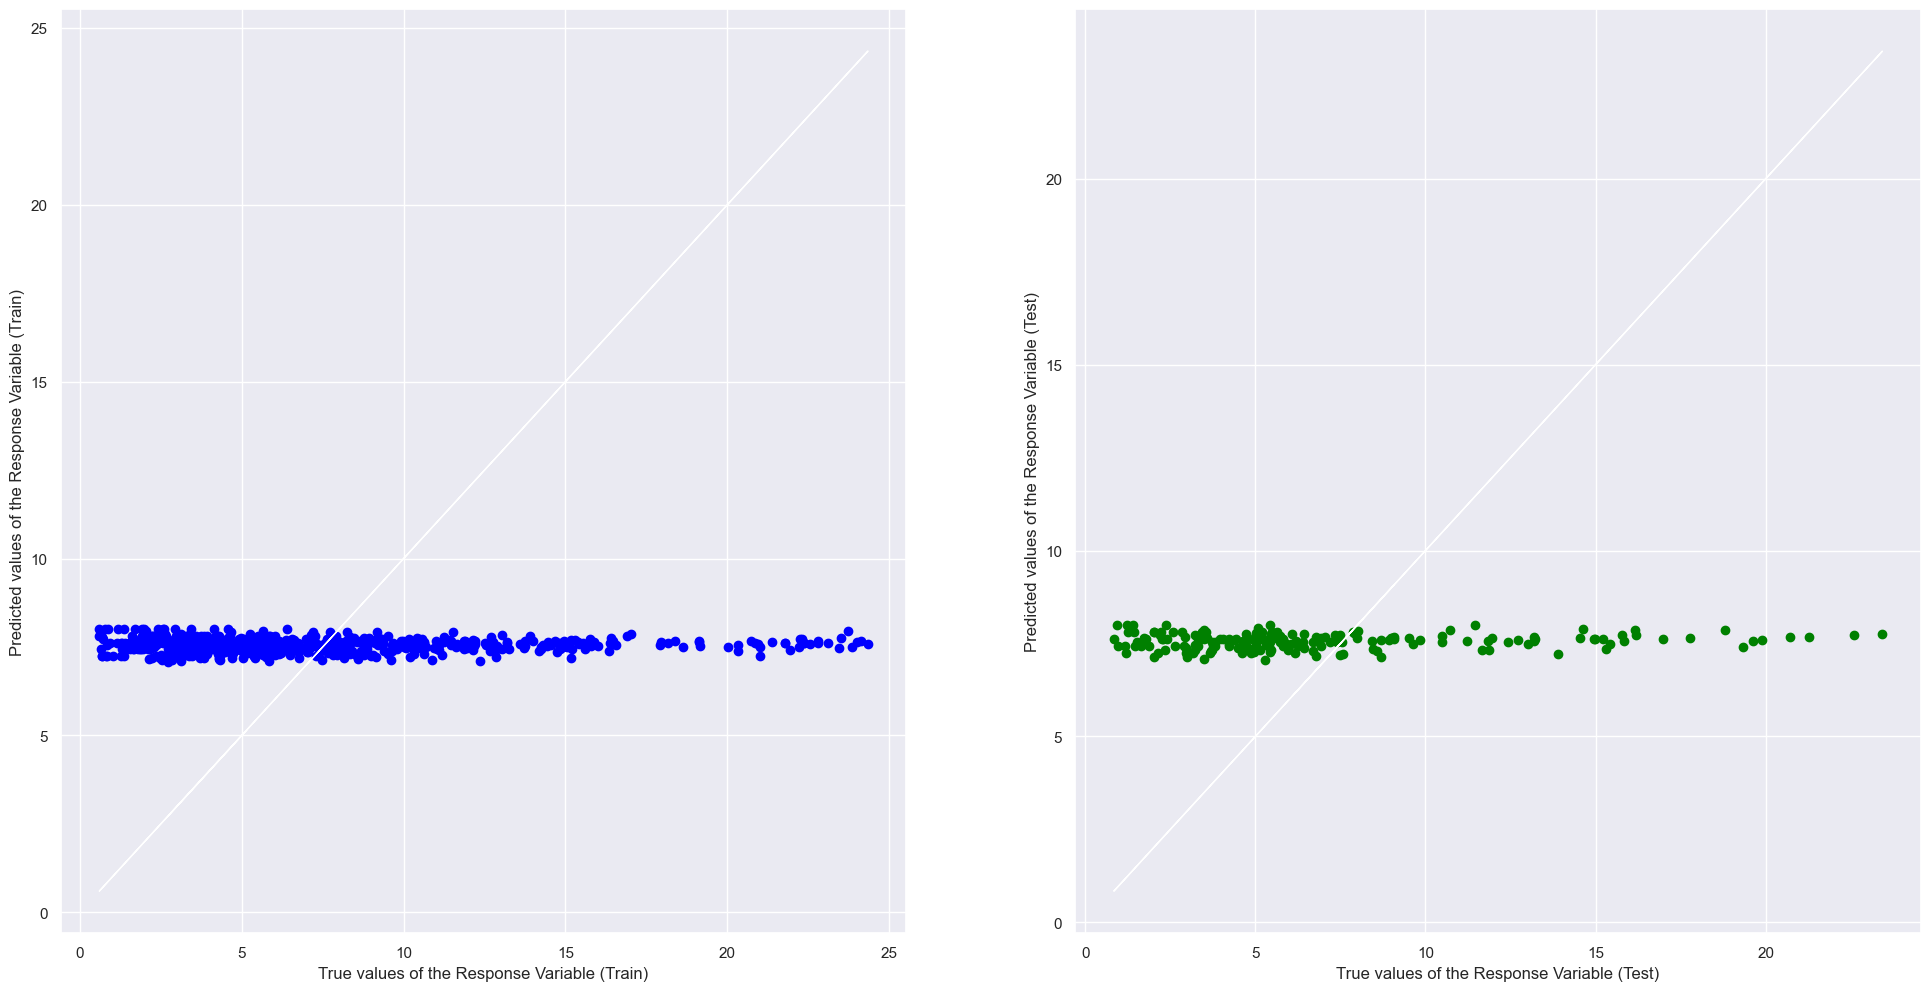

In [70]:
'''Generate and fit a univariate regression model using 'average_rating' as the predictor and 'popularity' 
as the response variable. Outliers are removed from both variables before fitting the model.'''
linreg, X_train, y_train, X_test, y_test = gen_uv_reg('average_rating','popularity', rmv_outliers_X=True, rmv_outliers_y=True)

# Plot the predicted values against the true values for both training and testing datasets.
plot_pred_vs_true(linreg, y_train, y_test)

### Univariate Linear Regression for "popularity" against "cast_popularity"

Intercept of Regression 	: b =  [3.01543487]
Coefficients of Regression 	: a =  [[0.09061885]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1997444497316323
Mean Squared Error (MSE) 	: 20.915910558242192

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.14026463695017
Mean Squared Error (MSE) 	: 23.032559599385667



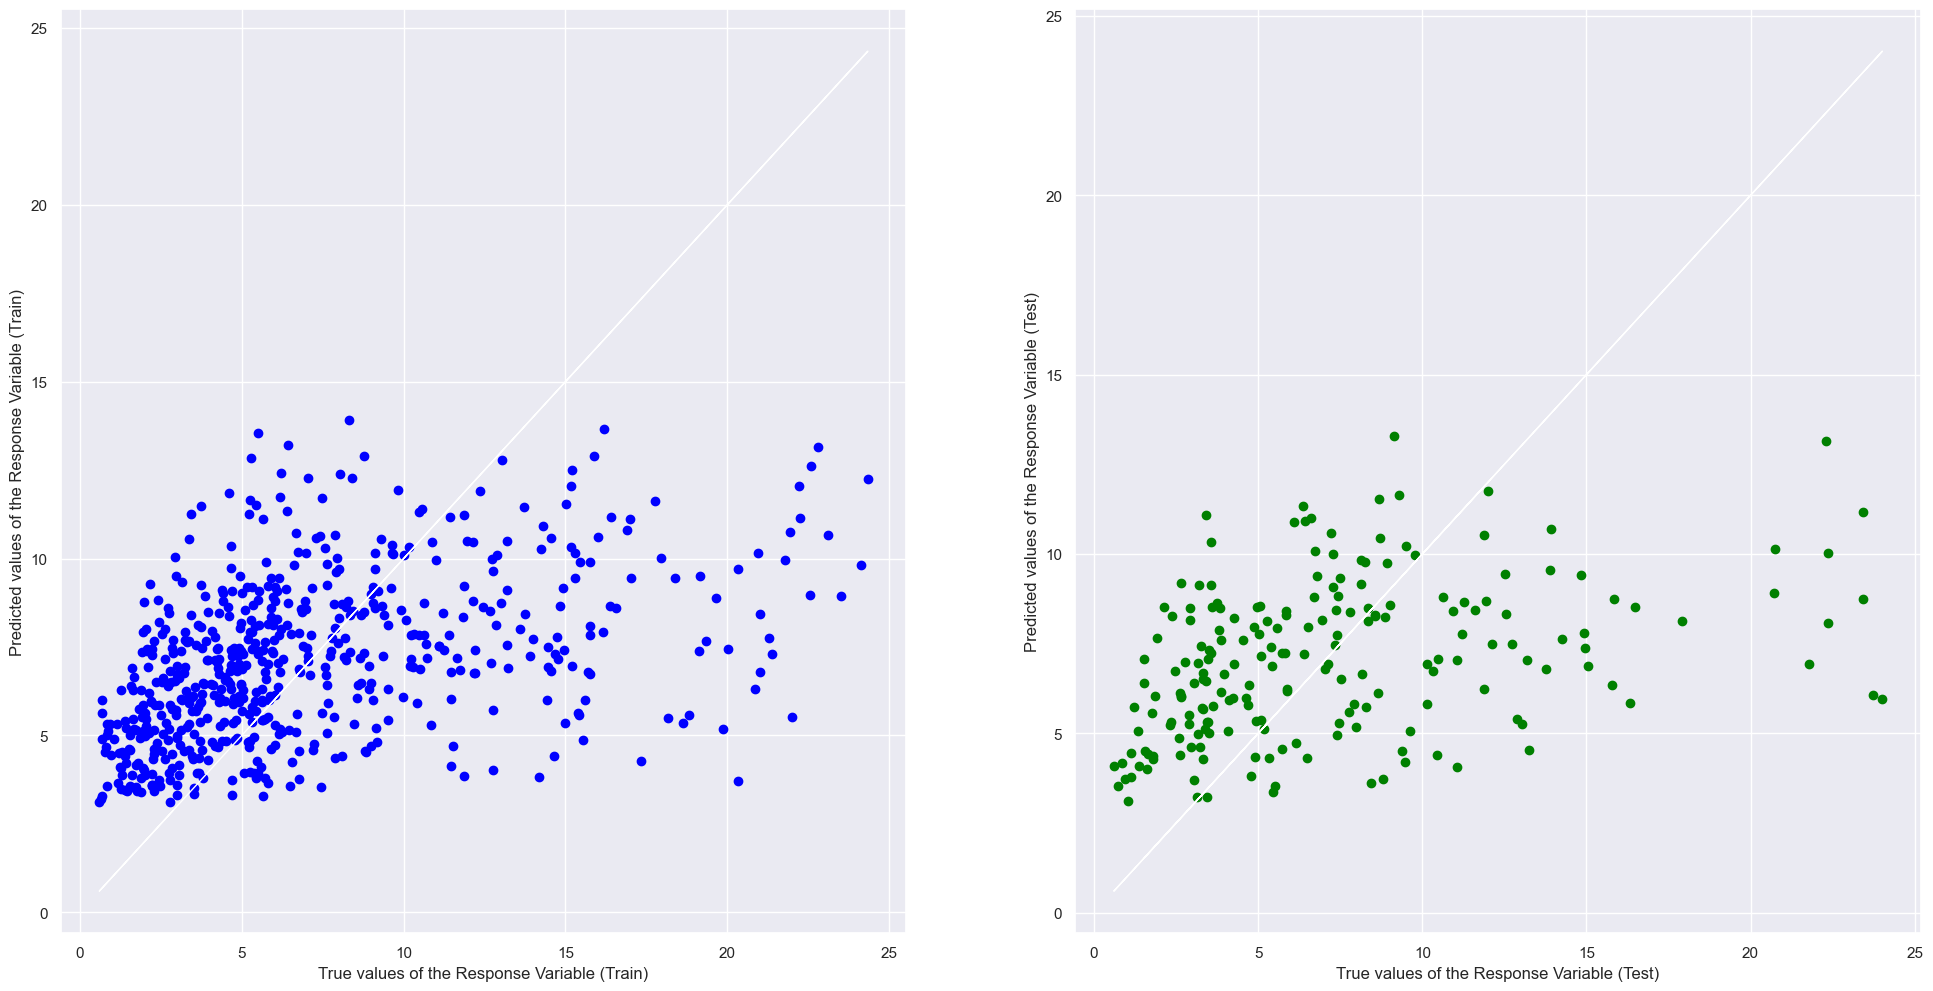

In [10]:
'''Generate and fit a univariate regression model using 'cast_popularity' as the predictor and 'popularity' 
as the response variable. Outliers are removed from both variables before fitting the model.'''
linreg, X_train, y_train, X_test, y_test = gen_uv_reg('cast_popularity','popularity', rmv_outliers_X=True, rmv_outliers_y=True)

# Plot the predicted values against the true values for both training and testing datasets.
plot_pred_vs_true(linreg, y_train, y_test)

### Univariate Linear Regression for "rating_count" against "popularity"

Intercept of Regression 	: b =  [1.61039306]
Coefficients of Regression 	: a =  [[0.68385611]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23441311951061472
Mean Squared Error (MSE) 	: 28.77660585283005

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29083164105401593
Mean Squared Error (MSE) 	: 26.81053349144146



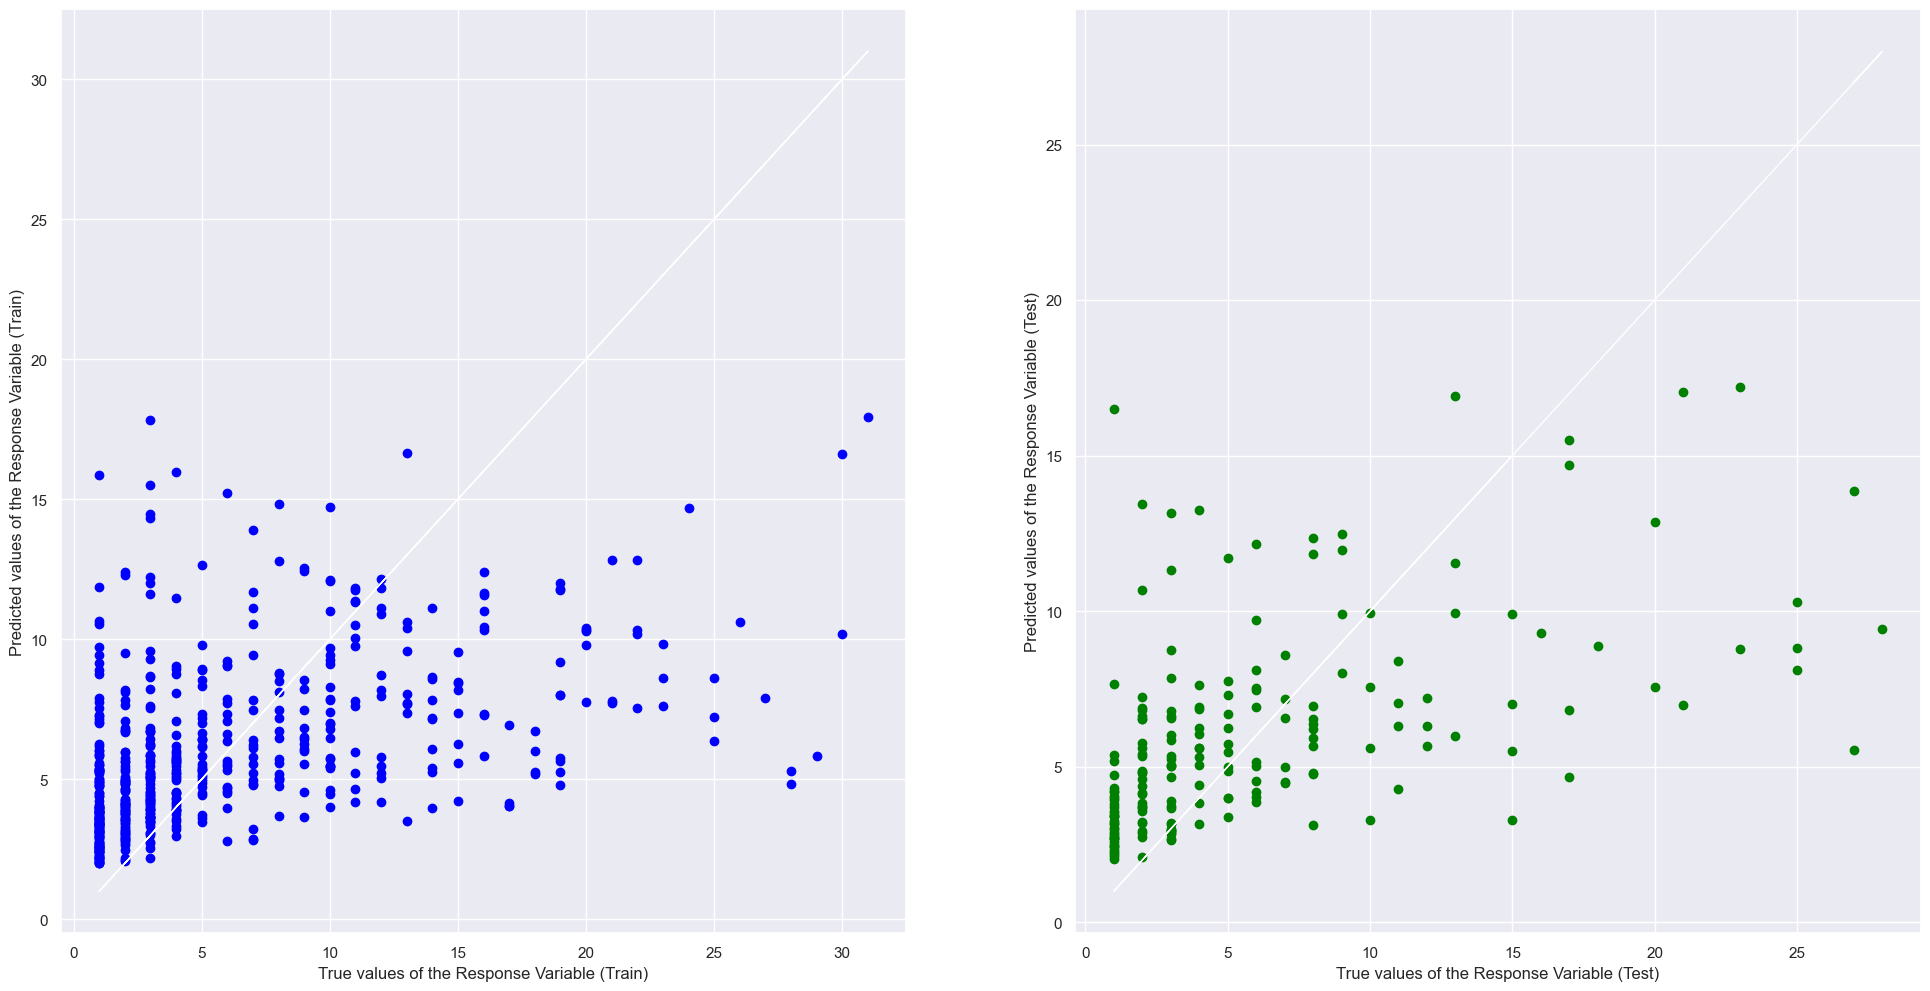

In [11]:
'''Generate and fit a univariate regression model using 'popularity' as the predictor and 'rating_count' 
as the response variable. Outliers are removed from both variables before fitting the model.'''
linreg, X_train, y_train, X_test, y_test = gen_uv_reg('popularity','rating_count', rmv_outliers_X=True, rmv_outliers_y=True)

# Plot the predicted values against the true values for both training and testing datasets.
plot_pred_vs_true(linreg, y_train, y_test)

## <u>Needs working on</u>

Through exploration, we realise that not one single variable is strongly correlated to another.
This could be perhaps due to the limitation of the popularity field.

# Exploratory Analysis 2: Exploratory Classification

Now, we shall explore the categorical data. From below, we have identified the following areas of concern:

1. Number of Seasons    - Typically 1, 2 or 3, with the exception of one 6.
2. Genres               - There is a limited number of genres.
3. Networks             - There is a limited number of networks. However, there are many (77) hence classification may not be ideal.
4. Production Companies - There is a limited number of production companies. However, there are many (267) hence classification may not be ideal.

In addition, we shall add another column to count the number of networks each drama is listed to. This will be another categorical variable.


Before we go on to the exploration, let us first make some predictions.

1. Number of Networks vs. Popularity:
   > Belief: The more number of networks, the higher the popularity due to a larger outreach.
2. Cast Popularity vs Number of Networks:
   >Belief: The more popular the cast, the more number of networks.
3. Popularity vs. Number of Seasons:
   > Belief: Higher popularity means producers will likely want to make more seasons.
4. Average Rating vs. Number of Seasons:
   > Belief: Better ratings mean producers will likely want to make more seasons.
5. Cast Popularity vs. Number of Seasons:
   > Belief: More popular cast members mean that their schedules are harder to coordinate for more seasons.

In [12]:
data.dtypes

tmdb_id                   int64
name                     object
original_name            object
keywords                 object
airing_date              object
directors                object
cast                     object
genres                   object
number_of_seasons       float64
number_of_episodes      float64
episode_run_time        float64
synopsis                 object
popularity              float64
average_rating          float64
rating_count            float64
networks                 object
production_companies     object
cast_popularity         float64
dtype: object

In [13]:
# Initialize a new column 'number_networks' in the DataFrame 'data' to store the count of networks for each row.
data['number_networks'] = 0

# Iterate over each row in the DataFrame to count the number of networks listed in the 'networks' column.
for i, row in data.iterrows():
    # Iterate through each network entry in the 'networks' list of the current row.
    for n in row.networks:
        # Increment the count in 'number_networks' for the current row by 1 for each network found.
        data.loc[i, 'number_networks'] += 1
data.head()

,tmdb_id,name,original_name,keywords,airing_date,directors,cast,genres,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,networks,production_companies,cast_popularity,number_networks
0,99966,All of Us Are Dead,지금 우리 학교는,"[high school, bullying, based on comic, horror...",2022-01-28,[JQ Lee],"[Park Ji-hu, Yoon Chan-young, Cho Yi-hyun, Lom...","[Action & Adventure, Drama, Sci-Fi & Fantasy]",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,[Netflix],"[Kim Jong-hak Production, SLL, Film Monster]",82.507,1
1,93405,Squid Game,오징어 게임,"[secret organization, challenge, survival, fic...",2021-09-17,[Hwang Dong-hyuk],"[Lee Jung-jae, Park Hae-soo, Jung Ho-yeon, Wi ...","[Action & Adventure, Mystery, Drama]",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,[Netflix],[Siren Pictures],68.428,1
2,136699,Glitch,글리치,"[friendship, investigation, ufo, miniseries, s...",2022-10-07,[Roh Deok],"[Jeon Yeo-been, Nana, Lee Dong-hwi, Ryu Kyung-...","[Drama, Comedy, Mystery, Sci-Fi & Fantasy]",1.0,10.0,54.0,A young woman joins forces with a UFO enthusia...,223.442,7.674,43.0,[Netflix],[Studio 329],81.095,1
3,197067,Extraordinary Attorney Woo,이상한 변호사 우영우,"[court case, court, autism, lawyer, courtroom,...",2022-06-29,[Yoo In-sik],"[Park Eun-bin, Kang Tae-oh, Kang Ki-young, Jeo...","[Drama, Comedy]",1.0,16.0,70.0,Brilliant attorney Woo Young-woo tackles chall...,147.054,8.310,381.0,"[Netflix, ENA]","[AStory, KT Studio Genie]",131.091,2
4,129473,Young Lady and Gentleman,신사와 아가씨,"[tutor, family, single father, healing, rich m...",2021-09-25,NaN,"[Ji Hyun-woo, Lee Se-hee, Park Ha-na, Oh Hyun-...","[Comedy, Drama, Family]",1.0,52.0,70.0,Lee Young Kook is a widower with three childre...,128.825,8.125,8.0,[KBS2],NaN,71.909,1


<u>The only drama with 6 seasons is considered an outlier and is dropped:</u>

In [14]:
without_extreme = data.drop(data[data.number_of_seasons == 6].index)

## Boxplot Visualizations

In [21]:
def gen_bnw(X_name, y_name, data=without_extreme):
    '''Generate a boxplot for visualizing the distribution of values of the response variable 'y_name'
    across different categories defined by the predictor variable 'X_name'.'''
    bpX = data[X_name]
    bpy = data[y_name]
    sb.boxplot(data=data, x=X_name, y=y_name)

### Boxplot Visualization of Popularity and Number of Networks

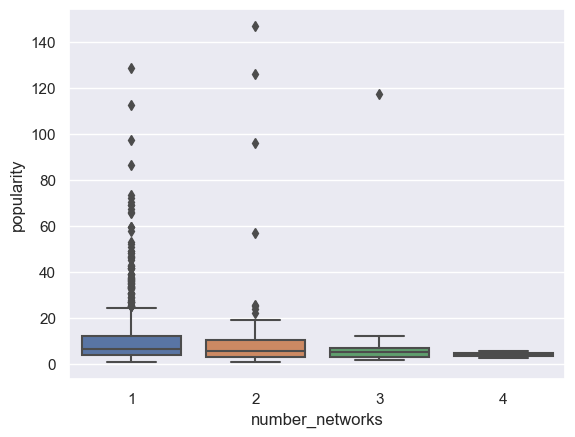

In [31]:
gen_bnw('number_networks','popularity')

<u>Dramas with popularity > 200 are outliers and are removed.</u>

In [24]:
without_extreme.drop(without_extreme[without_extreme.popularity > 200].index,inplace=True)

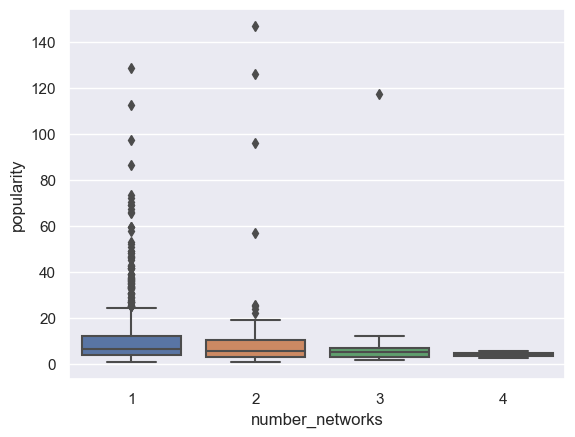

In [25]:
gen_bnw('number_networks','popularity')

### Boxplot Visualization of Cast Popularity and Number of Networks

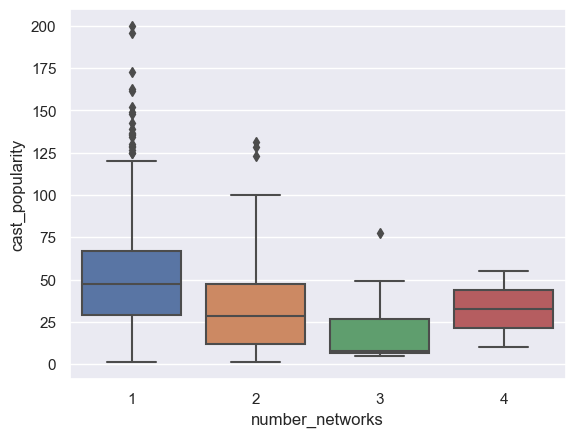

In [26]:
gen_bnw('number_networks','cast_popularity')

### Boxplot Visualization of Popularity and Number of Seasons


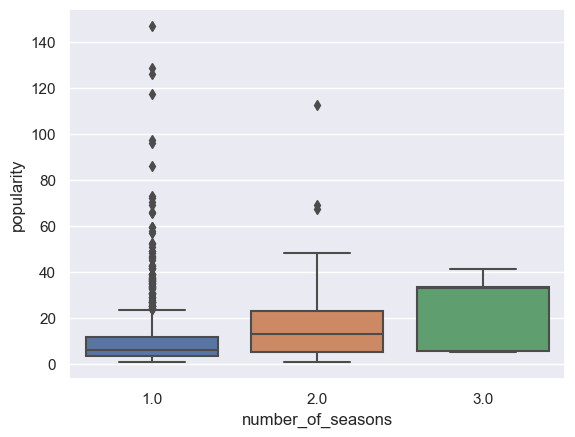

In [29]:
gen_bnw('number_of_seasons','popularity')

### Boxplot Visualization of Average Rating and Number of Seasons


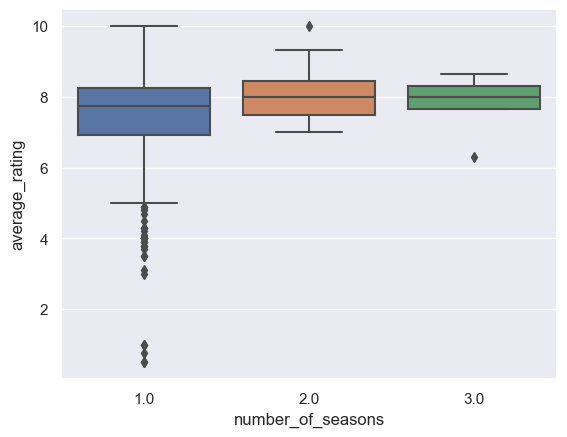

In [32]:
gen_bnw('number_of_seasons','average_rating')

### Boxplot Visualization of Cast Popularity and Number of Seasons


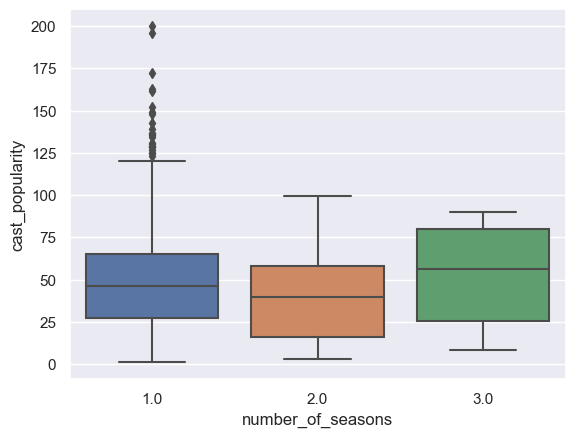

In [33]:
gen_bnw('number_of_seasons','cast_popularity')

## Decision Tree Classifiers

In [59]:
# Import essential models and functions from sklearn.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Generate, train, and evaluate a multivariate decision tree model.
def gen_mv_dec_tree(X_list, y_name, df=data, rmv_outliers_y=False, test_size=0.25, depth=3):
    
    # Prepare predictor and response dataframes.
    r = pd.DataFrame(df[y_name])
    p = pd.DataFrame(df[X_list])
    
    # Split data into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(p, r, test_size = test_size)
    
    # Initialize and fit the decision tree classifier.
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, y_train)
    
    # Predict on training and test datasets.
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    # Determine unique classes for the plot_tree function.
    class_names = y_train[y_name].unique().astype(str).tolist()  # Convert to list.

    # Plot the trained Decision Tree with dynamic class names.
    f = plt.figure(figsize=(24,24))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(X_train.columns),  # Convert columns to list.
          class_names=class_names) 
    
    # Check the Goodness of Fit (on Train Data).
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()
    cmTrain = confusion_matrix(y_train, y_train_pred)
    print()
    
    # Check the Goodness of Fit (on Test Data).
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    cmTest = confusion_matrix(y_test, y_test_pred)
    
    # Return the decision tree model and dataset splits.
    return dectree, X_train, y_train, X_test, y_test

In [49]:
# Display the confusion matrices for both training and testing datasets using predictions from a decision tree model.
def print_conf_mat(dectree, X_train, y_train, X_test, y_test):
    
    # Predict the response for both training and testing datasets.
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    # Set up a subplot with 1 row and 2 columns to display both confusion matrices side by side.
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Create a heatmap for the confusion matrix of the training data.
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    
    # Create a heatmap for the confusion matrix of the testing data.
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Decision Tree Model Evaluation for Predicting Number of Seasons from Average Ratings

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9588235294117647


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9691629955947136



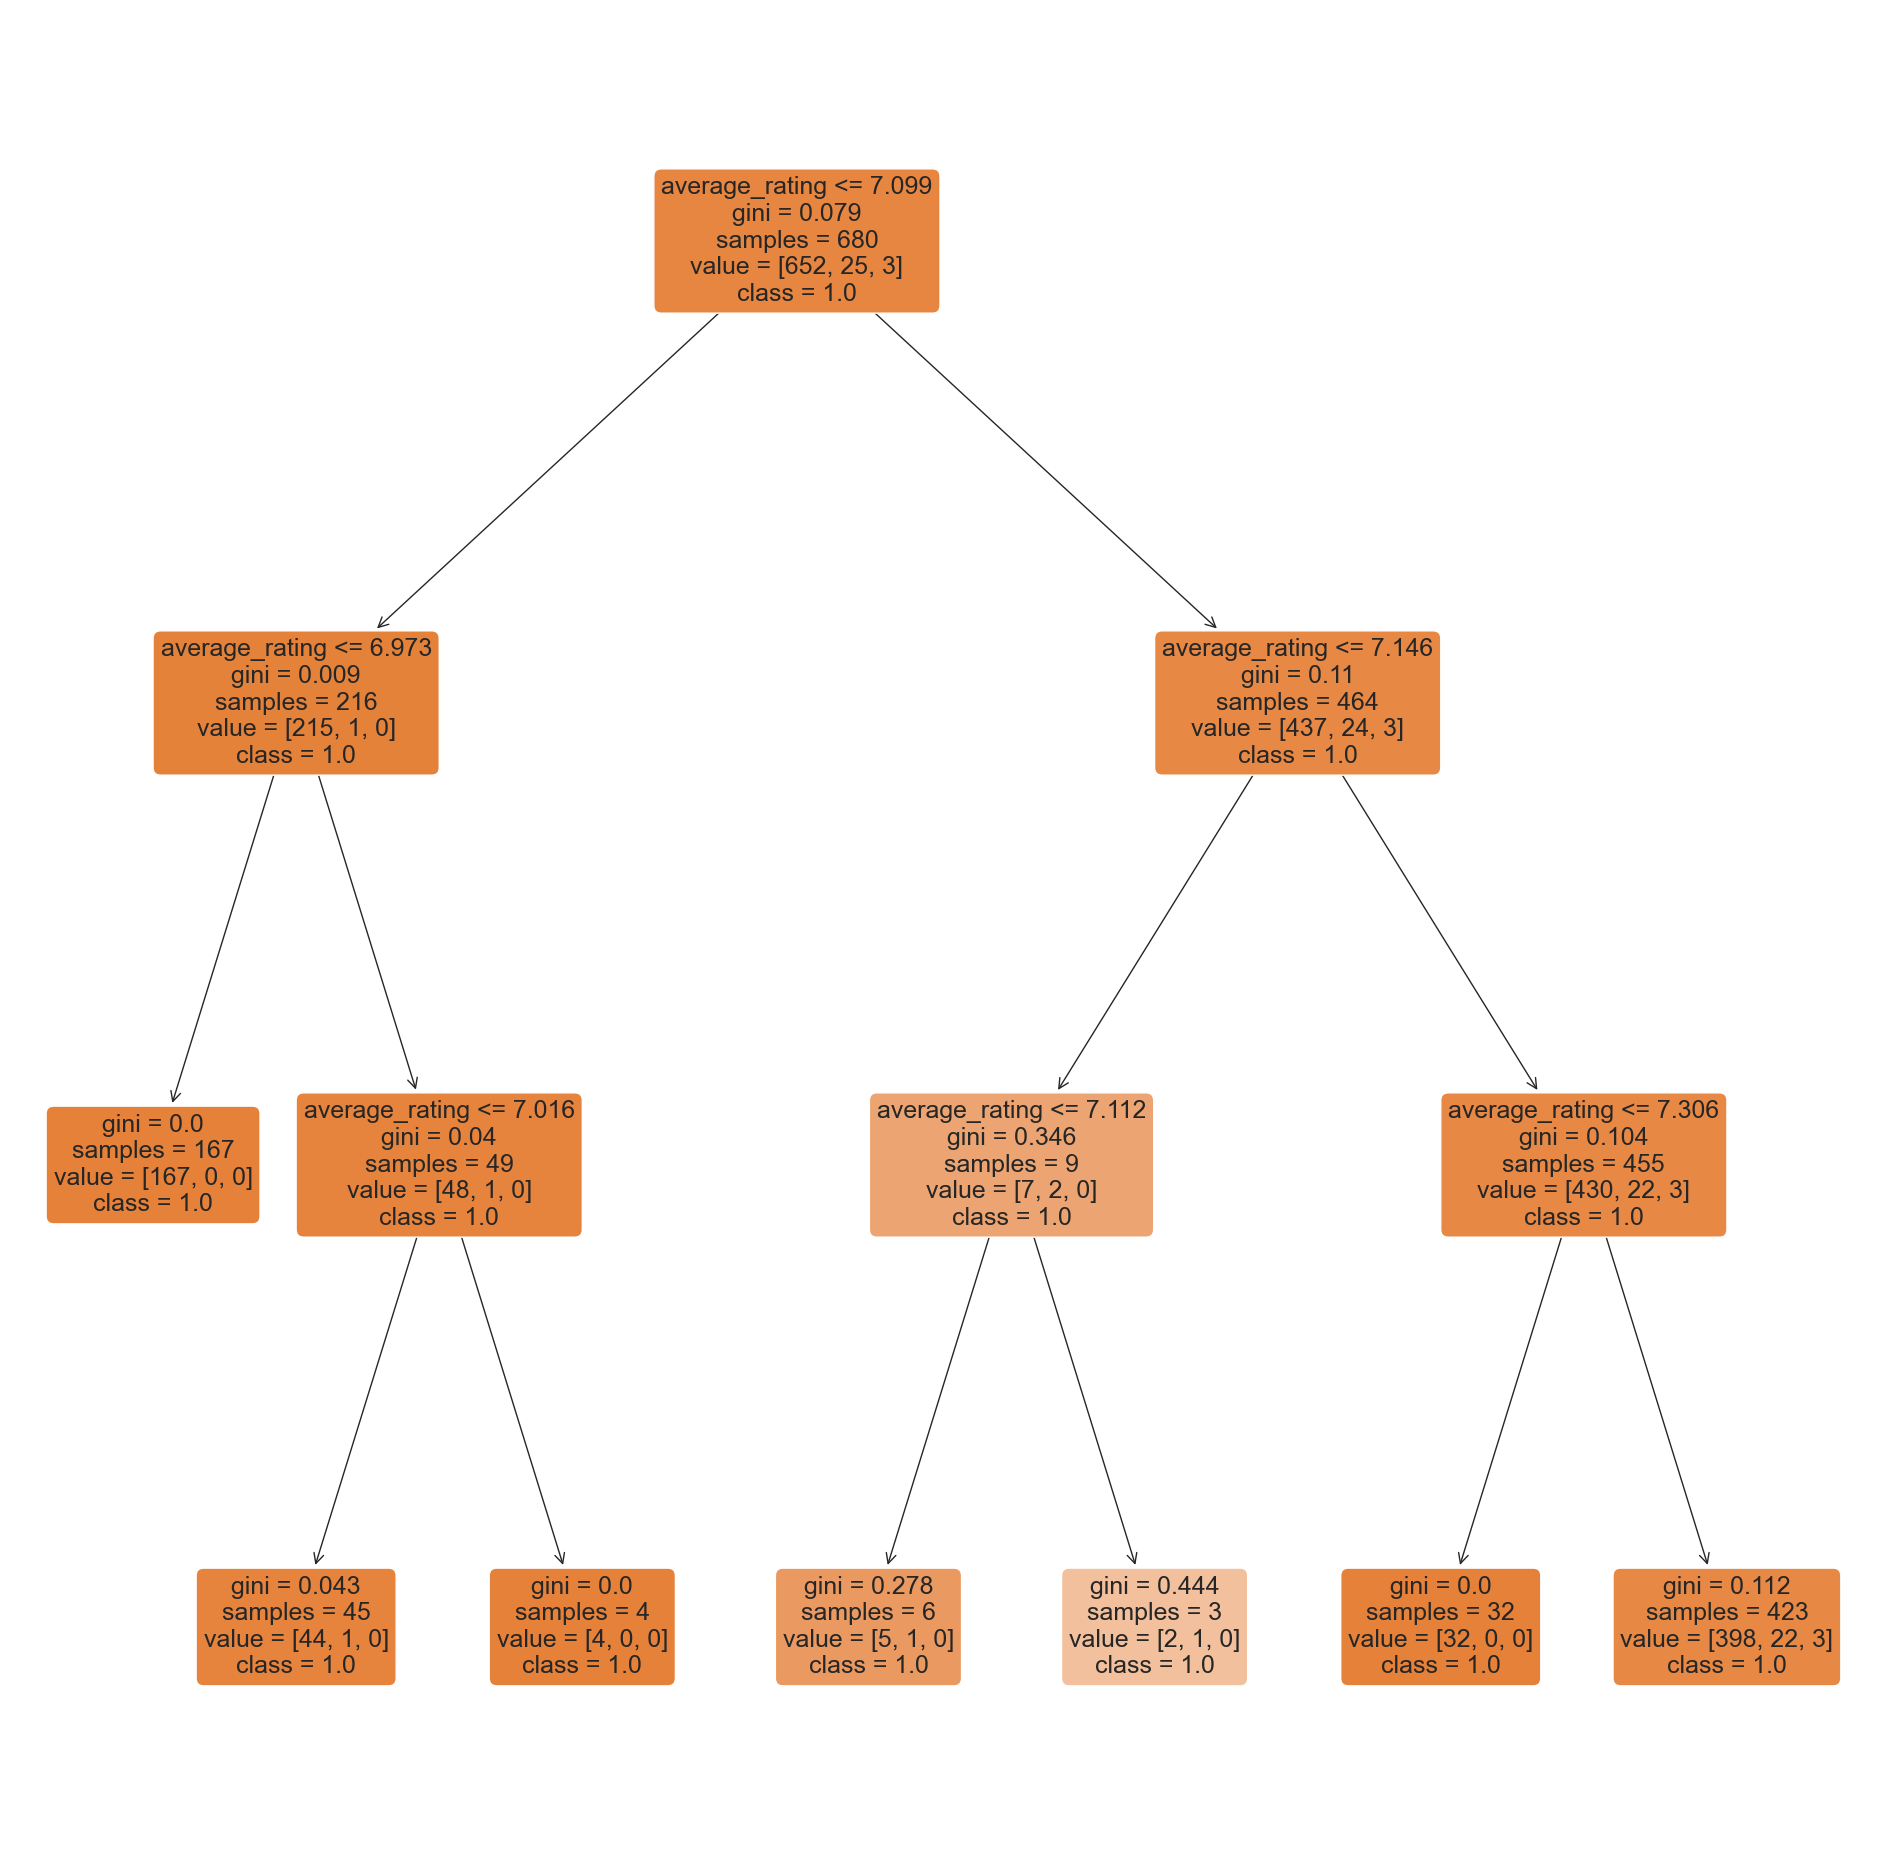

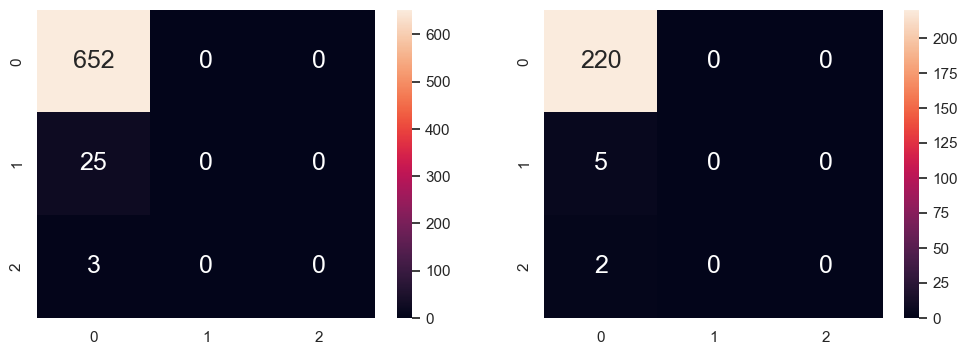

In [60]:
# Generate and evaluate a decision tree model of depth 3.
mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree = gen_mv_dec_tree('average_rating','number_of_seasons',df=without_extreme,depth=3)

# Display the confusion matrices for both the training and testing datasets.
print_conf_mat(mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree)

### Decision Tree Model Evaluation for Predicting Number of Seasons from Cast Popularity

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9632352941176471


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.960352422907489



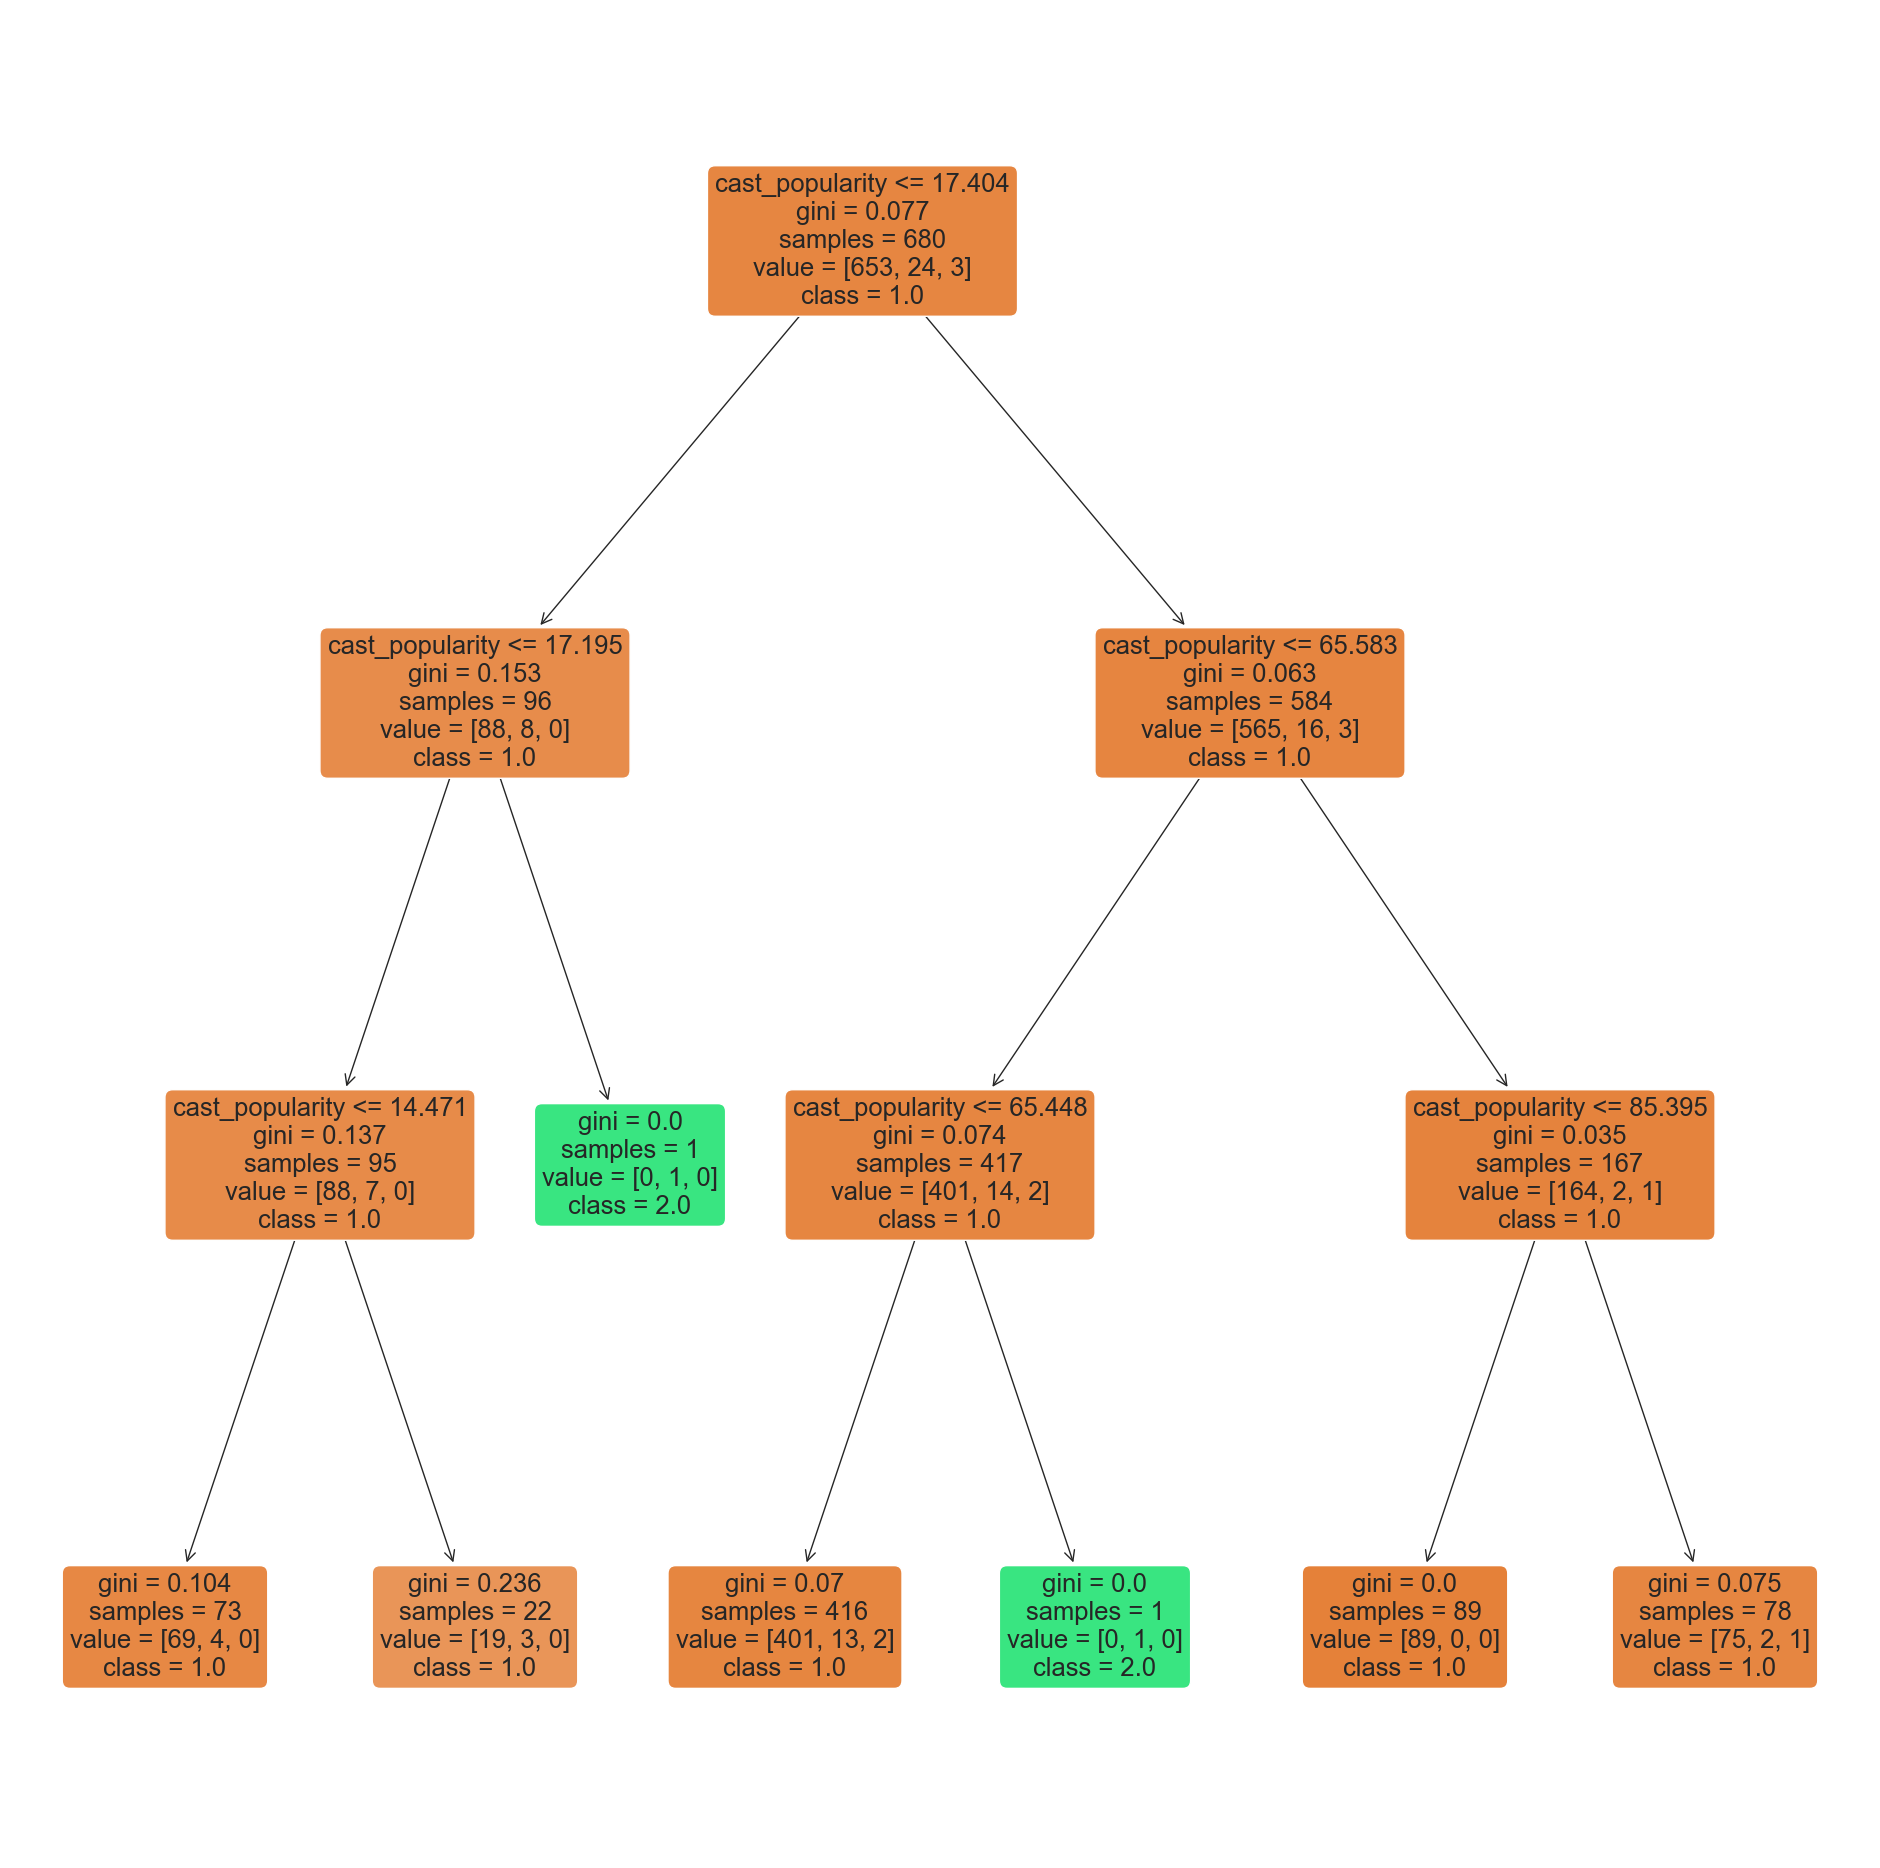

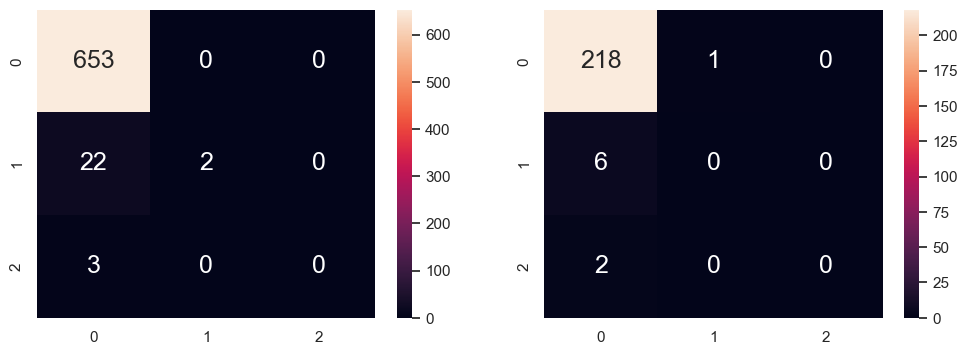

In [62]:
# Generate and evaluate a decision tree model of depth 3.
mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree = gen_mv_dec_tree('cast_popularity','number_of_seasons',df=without_extreme,depth=3)

# Display the confusion matrices for both the training and testing datasets.
print_conf_mat(mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree)

### Decision Tree Model Evaluation for Predicting Number of Seasons from Popularity

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9647058823529412


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.960352422907489



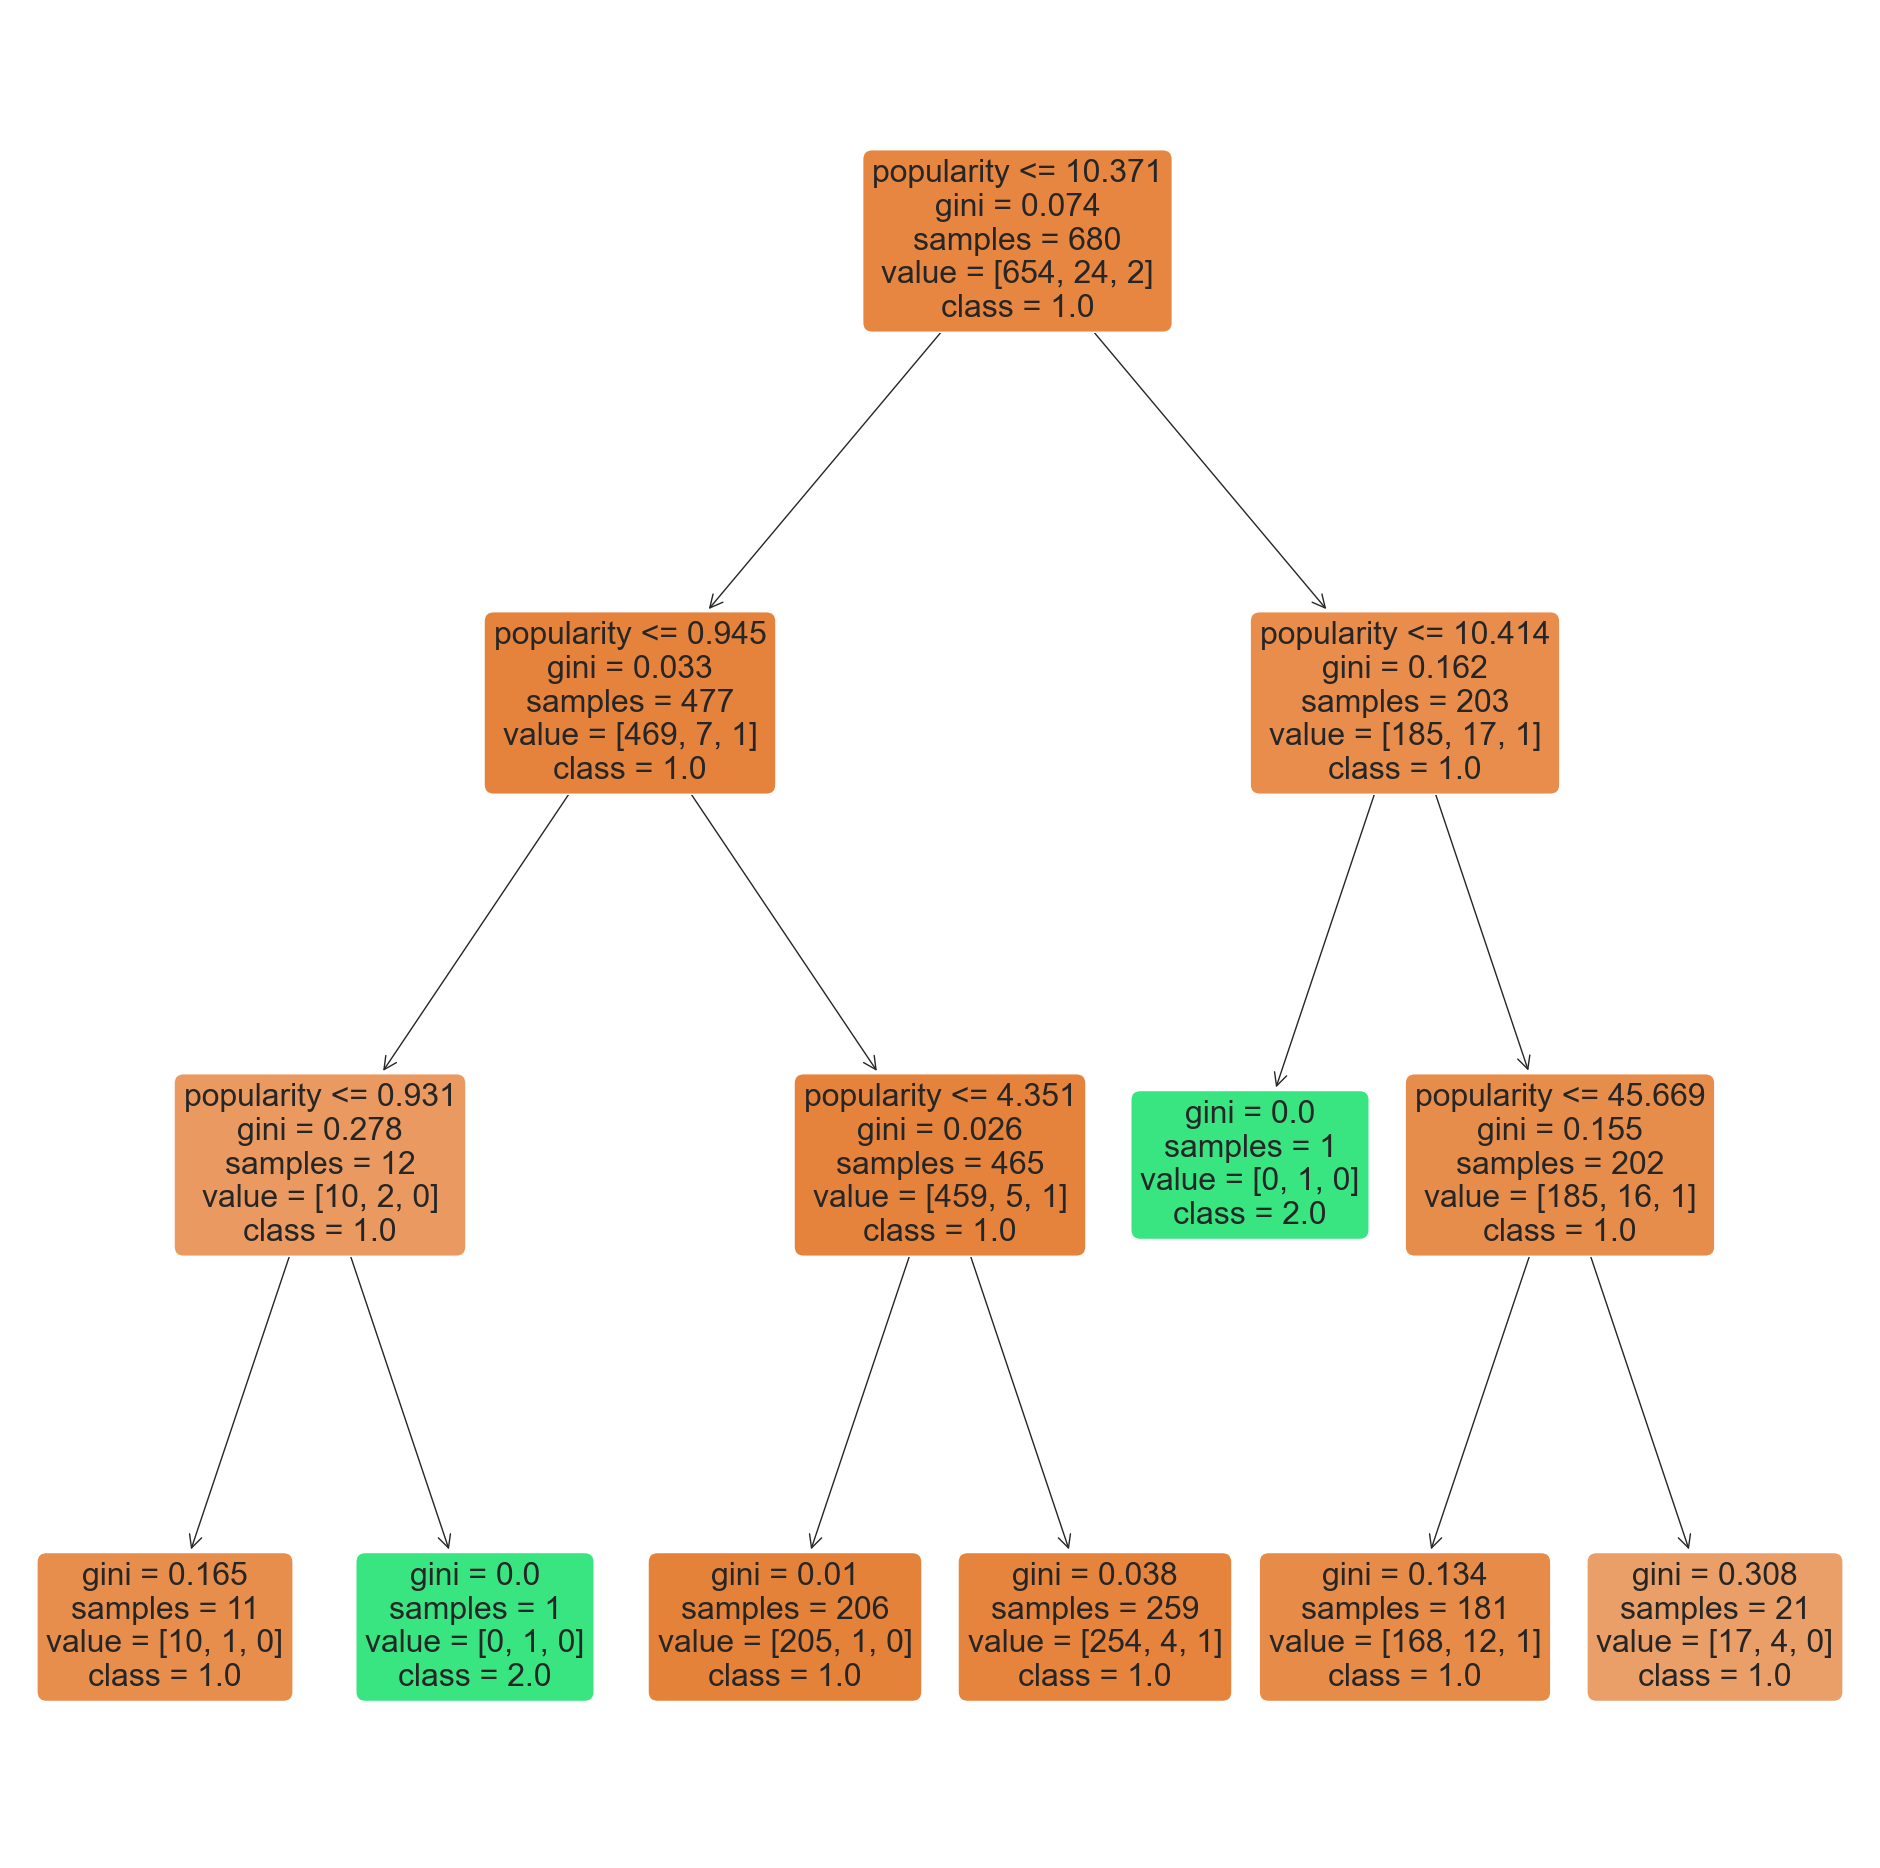

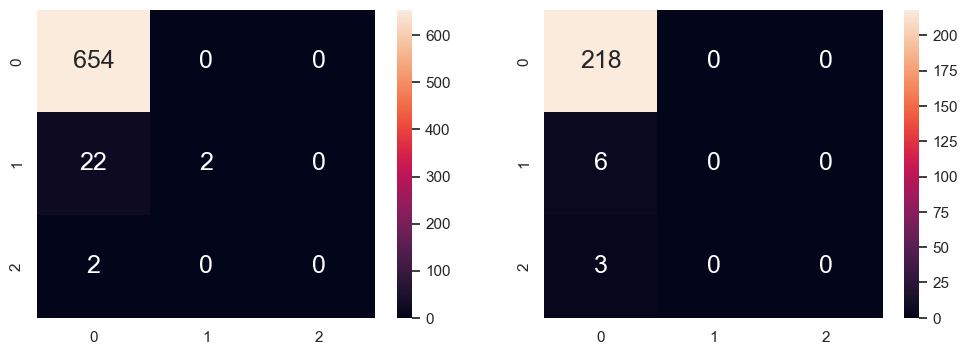

In [63]:
# Generate and evaluate a decision tree model of depth 3.
mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree = gen_mv_dec_tree('popularity','number_of_seasons',df=without_extreme,depth=3)

# Display the confusion matrices for both the training and testing datasets.
print_conf_mat(mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree)

### Decision Tree Model Evaluation for Predicting Number of Networks from Popularity 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9176470588235294


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9295154185022027



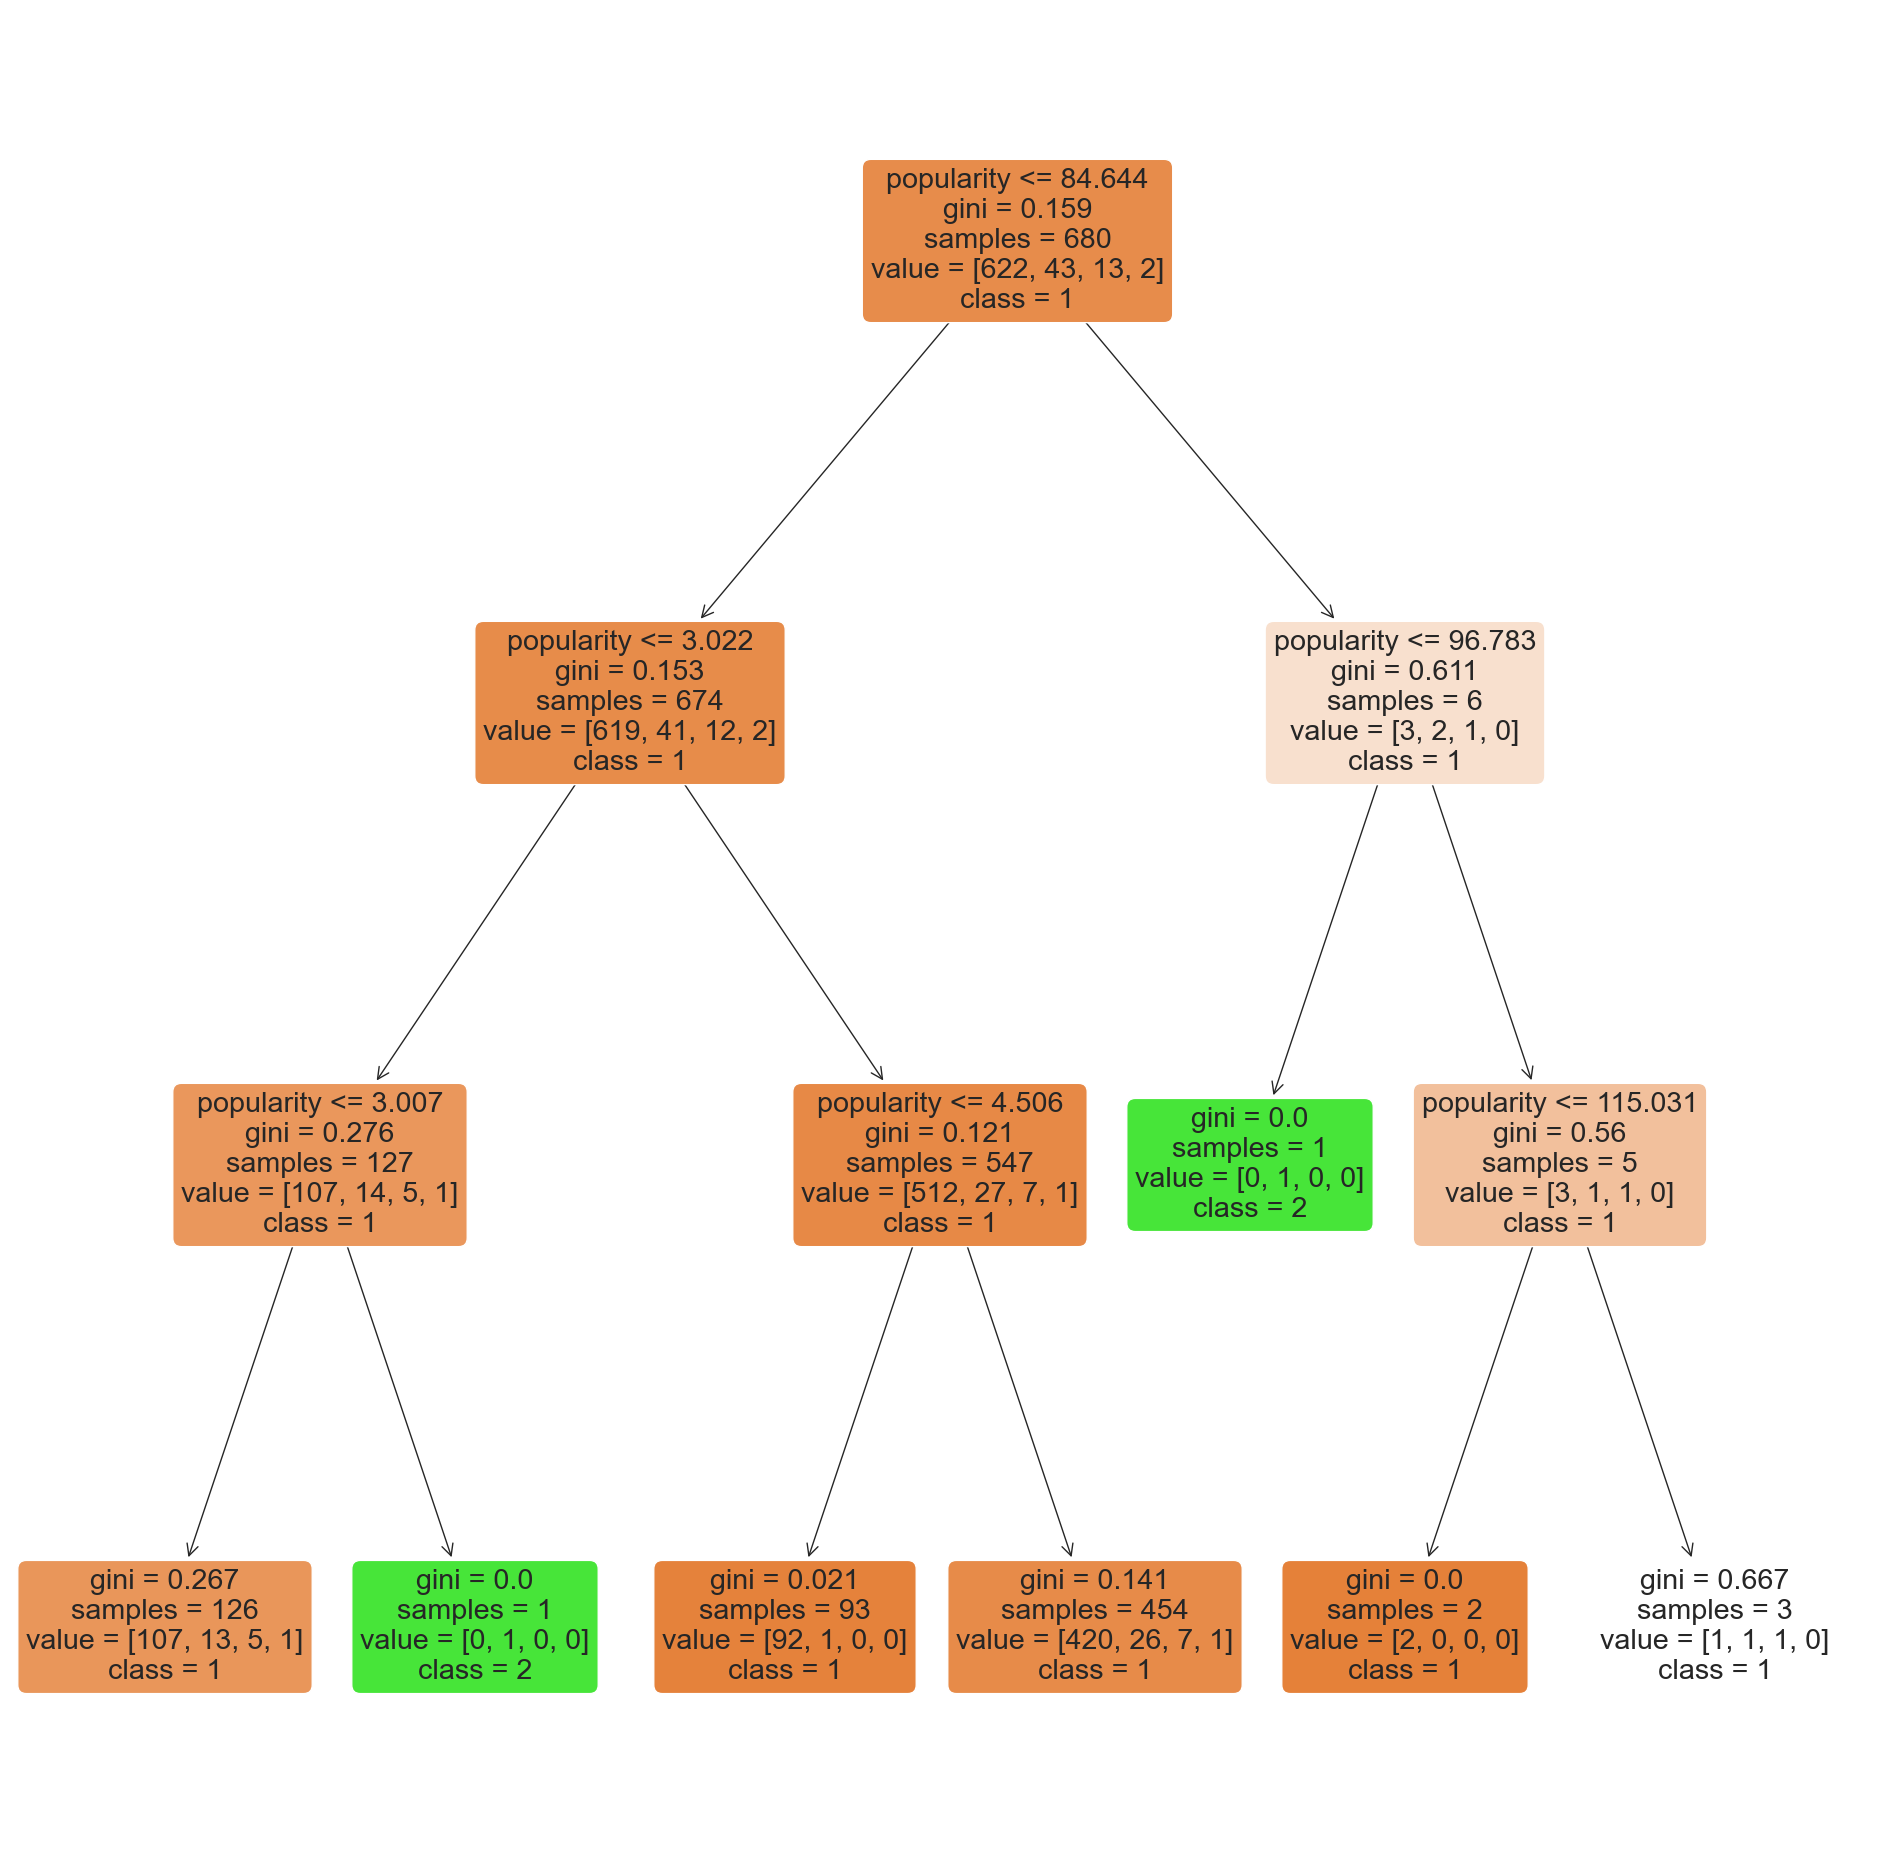

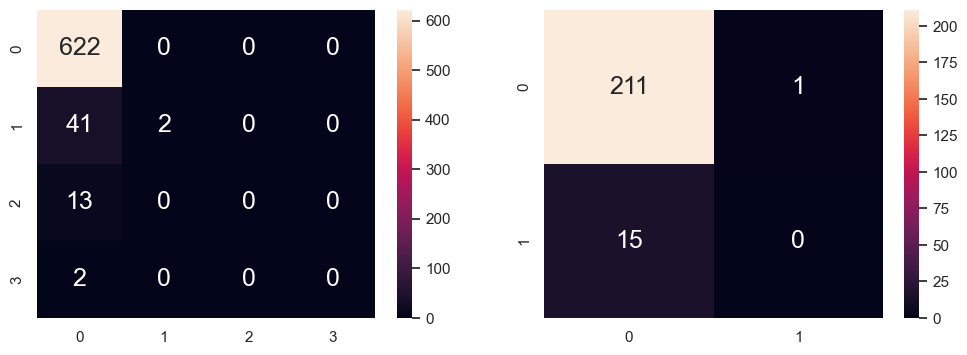

In [68]:
# Generate and evaluate a decision tree model of depth 3.
mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree = gen_mv_dec_tree('popularity','number_networks',df=without_extreme,depth=3)

# Display the confusion matrices for both the training and testing datasets.
print_conf_mat(mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree)

### Decision Tree Model Evaluation for Predicting Number of Networks from Cast Popularity

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9323529411764706


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8942731277533039



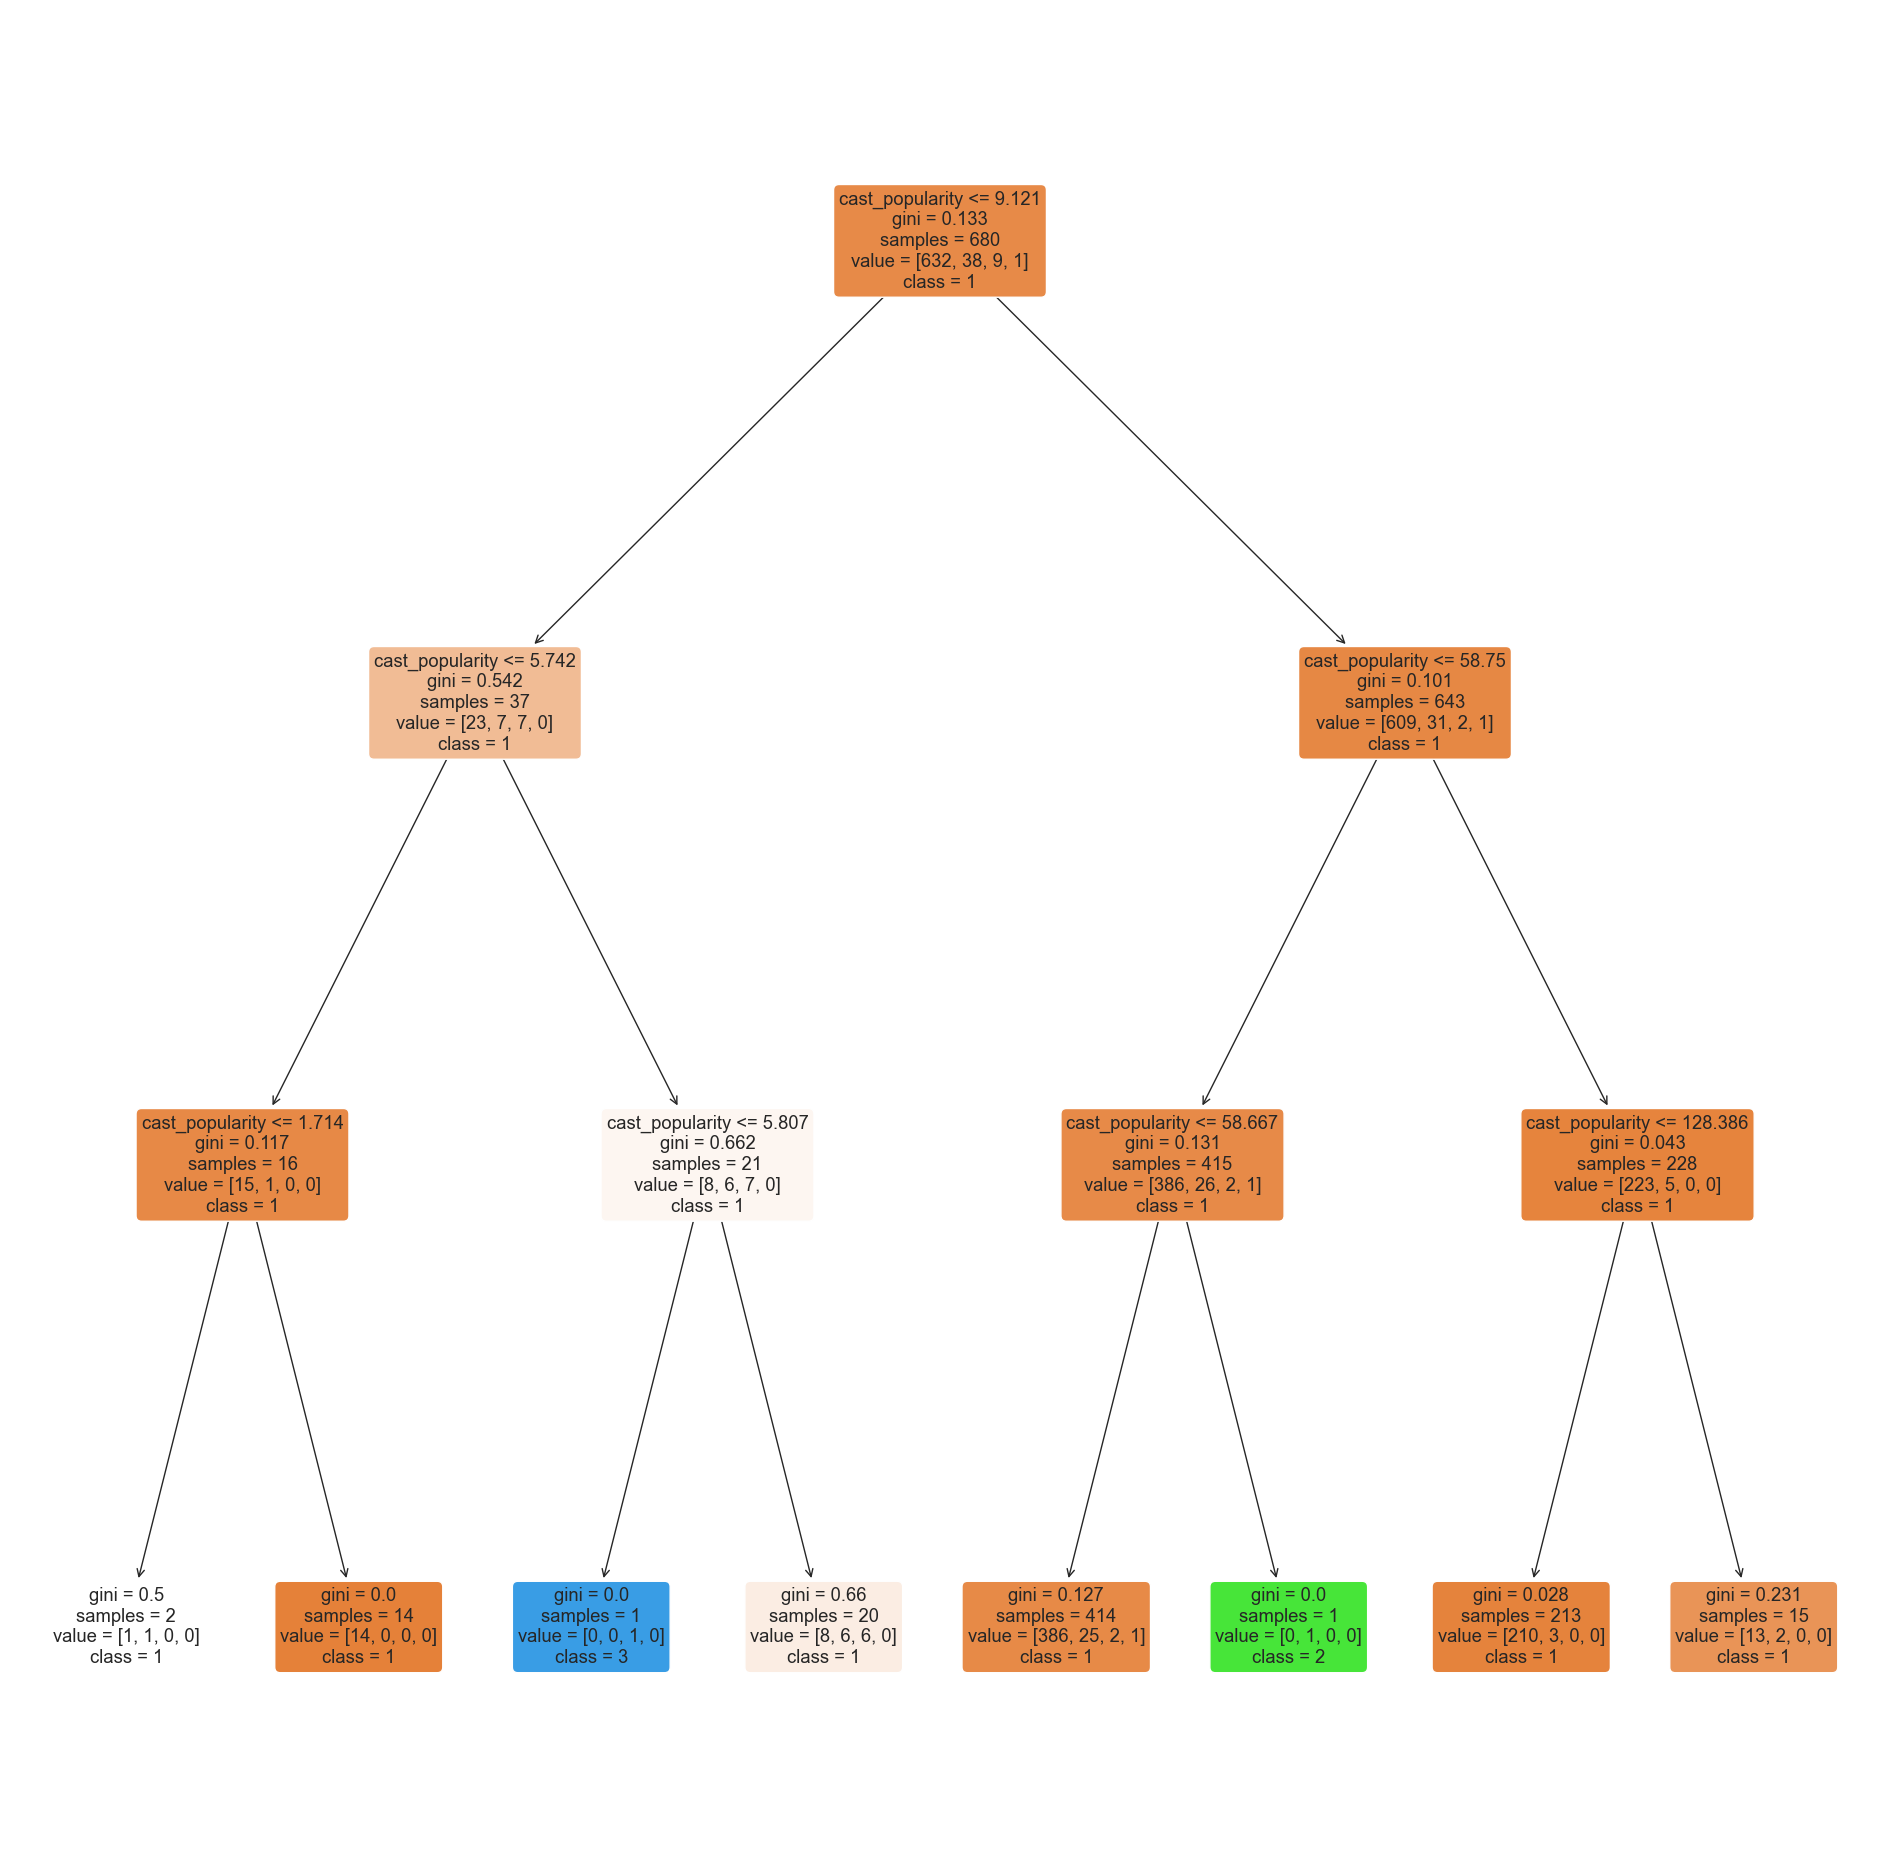

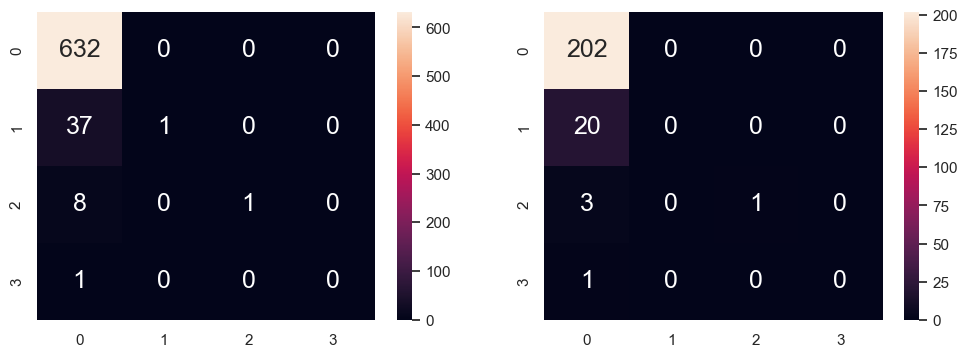

In [69]:
# Generate and evaluate a decision tree model of depth 3.
mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree = gen_mv_dec_tree('cast_popularity','number_networks',df=without_extreme,depth=3)

# Display the confusion matrices for both the training and testing datasets.
print_conf_mat(mvdec, X_train_tree, y_train_tree, X_test_tree, y_test_tree)